In [1]:
# Importing libraries

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import matplotlib.style
plt.style.use('classic')

from sklearn.impute import SimpleImputer
from sklearn import preprocessing

import statsmodels.stats as stats
import statsmodels.api as sm
import copy
import scipy
import pylab
import statsmodels

import pandas as pd
from datetime import datetime

#from pandas_profiling import ProfileReport

#modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import chardet#for encoding

import warnings
warnings.filterwarnings("ignore")


\\\Problem statement:

A house value is simply more than location and square footage. Like the features that make up a
person, an educated party would want to know all aspects that give a house its value. For
example, you want to sell a house and you don’t know the price which you may expect — it can’t
be too low or too high. To find house price you usually try to find similar properties in your
neighborhood and based on gathered data you will try to assess your house price.
Objective:
Take advantage of all of the feature variables available below, use it to analyse and predict house
prices.
1. cid: a notation for a house
2. dayhours: Date house was sold
3. price: Price is prediction target
4. room_bed: Number of Bedrooms/House
5. room_bath: Number of bathrooms/bedrooms
6. living_measure: square footage of the home
7. lot_measure: quare footage of the lot
8. ceil: Total floors (levels) in house
9. coast: House which has a view to a waterfront
10. sight: Has been viewed
11. condition: How good the condition is (Overall)
12. quality: grade given to the housing unit, based on grading system
13. ceil_measure: square footage of house apart from basement
14. basement_measure: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or
might not have affected the lotsize area
21. lot_measure15: lotSize area in 2015(implies-- some renovations)
22. furnished: Based on the quality of room
23. total_area: Measure of both living and lot

In [2]:
#Let's see which encoding we have to apply.

data = pd.read_excel('innercity.xlsx')


In [3]:
#Let's see which encoding we have to apply.

with open("innercity.xlsx","rb") as f:
    result=chardet.detect(f.read(100000))
print(result)


{'encoding': None, 'confidence': 0.0, 'language': None}


In [4]:
# First 5 rows of Dataset

data.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [5]:
# Last 5 rows of Dataset

data.tail()

cid         dayhours    price  room_bed  room_bath  \
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[5 rows x 23 columns]

In [6]:
# Info of Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [7]:
# Shape of Dataset

data.shape

(21613, 23)

In [8]:
# Display of columns

pd.options.display.max_columns = None  # None means display all columns
# You can set a specific number if you want to limit the displayed columns, e.g., pd.options.display.max_columns = 10

# Display the dataset
print(data)

# Get the number of columns
num_columns = data.shape[1]

# Display the number of columns
print("Number of columns:", num_columns)

              cid         dayhours    price  room_bed  room_bath  \
0      3876100940  20150427T000000   600000       4.0       1.75   
1      3145600250  20150317T000000   190000       2.0       1.00   
2      7129303070  20140820T000000   735000       4.0       2.75   
3      7338220280  20141010T000000   257000       3.0       2.50   
4      7950300670  20150218T000000   450000       2.0       1.00   
...           ...              ...      ...       ...        ...   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight condition  quality  \
0              3050.0       9440.0    1     0    0.0         3      8.0   
1               670.0       3101.

In [9]:
# To Describe the Dataset

data.describe(include="all")

cid         dayhours         price      room_bed  \
count   2.161300e+04            21613  2.161300e+04  21505.000000   
unique           NaN              372           NaN           NaN   
top              NaN  20140623T000000           NaN           NaN   
freq             NaN              142           NaN           NaN   
mean    4.580302e+09              NaN  5.401822e+05      3.371355   
std     2.876566e+09              NaN  3.673622e+05      0.930289   
min     1.000102e+06              NaN  7.500000e+04      0.000000   
25%     2.123049e+09              NaN  3.219500e+05      3.000000   
50%     3.904930e+09              NaN  4.500000e+05      3.000000   
75%     7.308900e+09              NaN  6.450000e+05      4.000000   
max     9.900000e+09              NaN  7.700000e+06     33.000000   

           room_bath  living_measure   lot_measure     ceil    coast  \
count   21505.000000    21596.000000  2.157100e+04  21571.0  21612.0   
unique           NaN             NaN           NaN      7.0      3.0   
top              NaN             NaN           NaN      1.0      0.0   
freq             NaN             NaN           NaN  10647.0  21421.0   
mean        2.115171     2079.860761  1.510458e+04      NaN      NaN   
std         0.770248      918.496121  4.142362e+04      NaN      NaN   
min         0.000000      290.000000  5.200000e+02      NaN      NaN   
25%         1.750000     1429.250000  5.040000e+03      NaN      NaN   
50%         2.250000     1910.000000  7.618000e+03      NaN      NaN   
75%         2.500000     2550.000000  1.068450e+04      NaN      NaN   
max         8.000000    13540.000000  1.651359e+06      NaN      NaN   

               sight  condition       quality  ceil_measure      basement  \
count   21556.000000    21556.0  21612.000000  21612.000000  21612.000000   
unique           NaN        6.0           NaN           NaN           NaN   
top              NaN        3.0           NaN           NaN           NaN   
freq             NaN    13978.0           NaN           NaN           NaN   
mean        0.234366        NaN      7.656857   1788.366556    291.522534   
std         0.766438        NaN      1.175484    828.102535    442.580840   
min         0.000000        NaN      1.000000    290.000000      0.000000   
25%         0.000000        NaN      7.000000   1190.000000      0.000000   
50%         0.000000        NaN      7.000000   1560.000000      0.000000   
75%         0.000000        NaN      8.000000   2210.000000    560.000000   
max         4.000000        NaN     13.000000   9410.000000   4820.000000   

        yr_built  yr_renovated       zipcode           lat      long  \
count    21612.0  21613.000000  21613.000000  21613.000000  21613.00   
unique     117.0           NaN           NaN           NaN    753.00   
top       2014.0           NaN           NaN           NaN   -122.29   
freq       559.0           NaN           NaN           NaN    116.00   
mean         NaN     84.402258  98077.939805     47.560053       NaN   
std          NaN    401.679240     53.505026      0.138564       NaN   
min          NaN      0.000000  98001.000000     47.155900       NaN   
25%          NaN      0.000000  98033.000000     47.471000       NaN   
50%          NaN      0.000000  98065.000000     47.571800       NaN   
75%          NaN      0.000000  98118.000000     47.678000       NaN   
max          NaN   2015.000000  98199.000000     47.777600       NaN   

        living_measure15  lot_measure15     furnished total_area  
count       21447.000000   21584.000000  21584.000000      21584  
unique               NaN            NaN           NaN      11145  
top                  NaN            NaN           NaN          $  
freq                 NaN            NaN           NaN         39  
mean         1987.065557   12766.543180      0.196720        NaN  
std           685.519629   27286.987107      0.397528        NaN  
min           399.000000     651.000000      0.000000        NaN

In [10]:
# To Convert the Date format into standard format

from datetime import datetime
def clean(i):
  return datetime.strptime(i[:8], '%Y%m%d')


In [11]:
data.dayhours=data.dayhours.apply(clean)
df_org=copy.deepcopy(data)


In [12]:
# To check conversion of the Date format into standard format

data.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940 2015-04-27  600000       4.0       1.75          3050.0   
1  3145600250 2015-03-17  190000       2.0       1.00           670.0   
2  7129303070 2014-08-20  735000       4.0       2.75          3040.0   
3  7338220280 2014-10-10  257000       3.0       2.50          1740.0   
4  7950300670 2015-02-18  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0     1966             0    98034  47.7228 -122.183            2020.0   
1     1948             0    98118  47.5546 -122.274            1660.0   
2     1966             0    98118  47.5188 -122.256            2620.0   
3     2009             0    98002  47.3363 -122.213            2030.0   
4     1924             0    98118  47.5663 -122.285            1120.0   

   lot_measure15  furnished total_area  
0         8660.0        0.0      12490  
1         4100.0        0.0       3771  
2         2433.0        0.0       5455  
3         3794.0        0.0       5461  
4         5100.0        0.0       5710

In [13]:
# Columns of Dataset

data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [14]:
#import sweetviz as sv

#report = sv.analyze(data)

#report.show_html("./report.html")

In [15]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent= 'geoapiExercises')

In [16]:
#geolocator.reverse("47.7228"+"," "-122.183").raw

In [17]:
# def location(cord):
#   Latitude = str(cord[0])
#   Longitude = str(cord[5])

#   location = geolocator.reverse( Latitude+","+Longitude).raw['address'] # raw returns a dictionary

#   # If the values are missing replace by a empty string

#   if location.get('Road') is None:
#   location ['Road'] = None

#   if location.get('County') is None:
#   location ['County'] = None

#   loc_update['County'].append(location['County'])
#   loc_update['Road'].append(location['Road'])

In [18]:
# loc_update = {"County": [],
#              "Road": [],
#              "Neighbourhood" :[]}

# for i, cord in enumerate(data.iloc[:,17:-5].values):

#  location(cord)
#   #Continously Reading our data and saving it on the go!!
#  pickle.dump(loc_update, open('loc_update.pickle','wb'))

#  if i%100 == 0:
#    print(i)

In [19]:
# import pickle

# loc_update = pickle.load(open("/content/loc_update.pickle", "rb"))

In [20]:
# loc_update

In [21]:
data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [22]:
# Categorizing the columns as categoical or numerical

cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)


['ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']
['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'sight', 'quality', 'ceil_measure', 'basement', 'yr_renovated', 'zipcode', 'lat', 'living_measure15', 'lot_measure15', 'furnished']


In [23]:
#data = data[(data["long"] != "$") | (data["lat"] != '$') | (data["zipcode"] != '$')]

In [24]:
# ['ceil', 'coast', 'condition', 'yr_built', 'long', 'total_area']
# This above columns contain $ sign in them so to detect and remove them from Dataset

In [25]:
for variable in cat:
    print(variable,":", sum(data[variable] == '$'))

ceil : 30
coast : 30
condition : 28
yr_built : 14
long : 34
total_area : 39


In [26]:
filter_columns = []

In [27]:
filter_columns = ["ceil", "coast", "condition", "yr_built", "long", "total_area"]
for variable in filter_columns:
  data = data[(data[variable] != "$")]


In [28]:
for variable in cat:
 print(variable,":", sum(data[variable] == '$'))

ceil : 0
coast : 0
condition : 0
yr_built : 0
long : 0
total_area : 0


In [29]:
data.head()

cid   dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940 2015-04-27  600000       4.0       1.75          3050.0   
1  3145600250 2015-03-17  190000       2.0       1.00           670.0   
2  7129303070 2014-08-20  735000       4.0       2.75          3040.0   
3  7338220280 2014-10-10  257000       3.0       2.50          1740.0   
4  7950300670 2015-02-18  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight condition  quality  ceil_measure  basement  \
0       9440.0    1     0    0.0         3      8.0        1800.0    1250.0   
1       3101.0    1     0    0.0         4      6.0         670.0       0.0   
2       2415.0    2     1    4.0         3      8.0        3040.0       0.0   
3       3721.0    2     0    0.0         3      8.0        1740.0       0.0   
4       4590.0    1     0    0.0         3      7.0        1120.0       0.0   

  yr_built  yr_renovated  zipcode      lat     long  living_measure15  \
0     1966             0    98034  47.7228 -122.183            2020.0   
1     1948             0    98118  47.5546 -122.274            1660.0   
2     1966             0    98118  47.5188 -122.256            2620.0   
3     2009             0    98002  47.3363 -122.213            2030.0   
4     1924             0    98118  47.5663 -122.285            1120.0   

   lot_measure15  furnished total_area  
0         8660.0        0.0      12490  
1         4100.0        0.0       3771  
2         2433.0        0.0       5455  
3         3794.0        0.0       5461  
4         5100.0        0.0       5710

**Making different list for categorical columns and numerical columns**


In [30]:
for i in data.columns:
  if i in ["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "zipcode", "furnished", "basement"]:
    data[i]=data[i].astype(str)


In [31]:
# data['long']=data['long'].astype('float64')
# data['total_area']=data['total_area'].astype('float64')
# data['basement']=data['basement'].astype('float64')
# data['zipcode']=data['zipcode'].astype('int64')
# data['yr_built']=data['yr_built'].astype('int64')
# # data['yr_built']=data['yr_built'].astype('int64')  astype_nansafe(arr, dtype, copy, skipna)
# # data['yr_built']=data['yr_built'].astype_nansafe('int64', copy)
# # data["yr_built"] = data["yr_built"].astype(np.int64)


In [32]:
data['yr_built'].isnull().sum()

1

In [33]:
data[(data["yr_built"].isnull() == True)]

cid   dayhours   price room_bed room_bath  living_measure  \
21226  2474400250 2014-06-30  327500      3.0      2.25          2310.0   

       lot_measure ceil coast sight condition quality  ceil_measure basement  \
21226          NaN  nan   nan   nan       nan     nan           NaN      nan   

      yr_built  yr_renovated zipcode      lat     long  living_measure15  \
21226      NaN             0   98031  47.4051 -122.193            1960.0   

       lot_measure15 furnished total_area  
21226         7201.0       0.0       9510

In [34]:
data['yr_built'].isnull().sum()

1

In [35]:
#This code will remove any row where the "yr_built" column has a missing value (NaN) and modify the data DataFrame in place.
#The subset=['yr_built'] parameter specifies that only the "yr_built" column should be considered for dropping rows.
# Assuming 'data' is your DataFrame

data.dropna(subset=['yr_built'], inplace=True)


In [36]:
data['yr_renovated'].isnull().sum()


0

In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21471 non-null  int64         
 1   dayhours          21471 non-null  datetime64[ns]
 2   price             21471 non-null  int64         
 3   room_bed          21471 non-null  object        
 4   room_bath         21471 non-null  object        
 5   living_measure    21454 non-null  float64       
 6   lot_measure       21430 non-null  float64       
 7   ceil              21471 non-null  object        
 8   coast             21471 non-null  object        
 9   sight             21471 non-null  object        
 10  condition         21471 non-null  object        
 11  quality           21471 non-null  object        
 12  ceil_measure      21471 non-null  float64       
 13  basement          21471 non-null  object        
 14  yr_built          2147

In [38]:
cat=['room_bed','room_bath','ceil','coast','sight','condition','quality','furnished']
num=['dayhours','price','living_measure','lot_measure','ceil_measure','basement','yr_built','yr_renovated','zipcode','lat','long','living_measure15','lot_measure15','total_area']


In [39]:
data.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed              0
room_bath             0
living_measure       17
lot_measure          41
ceil                  0
coast                 0
sight                 0
condition             0
quality               0
ceil_measure          0
basement              0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    124
lot_measure15        29
furnished             0
total_area           29
dtype: int64

In [40]:
# No. of unique variables

for i in cat:
  print(i,data[i].nunique())


room_bed 14
room_bath 30
ceil 7
coast 2
sight 6
condition 6
quality 12
furnished 3


In [41]:
# Describe categorical data

data[cat].describe().T

count unique  top   freq
room_bed   21471     14  3.0   9717
room_bath  21471     30  2.5   5328
ceil       21471      7    1  10584
coast      21471      2    0  21311
sight      21471      6  0.0  19311
condition  21471      6    3  13907
quality    21471     12  7.0   8917
furnished  21471      3  0.0  17219

In [42]:
print(num)

['dayhours', 'price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15', 'total_area']


In [43]:
# Describe numerical data

data[num].describe().T

count           mean            std         min  \
price             21471.0  539946.222253  365069.544228  75000.0000   
living_measure    21454.0    2080.061667     917.463737    290.0000   
lot_measure       21430.0   15113.530891   41441.843797    520.0000   
ceil_measure      21471.0    1788.735411     827.349120    290.0000   
yr_renovated      21471.0      84.125798     401.054790      0.0000   
lat               21471.0      47.560036       0.138564     47.1559   
living_measure15  21347.0    1987.165644     685.566090    399.0000   
lot_measure15     21442.0   12775.399963   27326.320428    651.0000   

                          25%          50%          75%           max  
price             322000.0000  450000.0000  645000.0000  7.700000e+06  
living_measure      1430.0000    1910.0000    2550.0000  1.354000e+04  
lot_measure         5040.0000    7619.0000   10676.5000  1.651359e+06  
ceil_measure        1190.0000    1560.0000    2210.0000  9.410000e+03  
yr_renovated           0.0000       0.0000       0.0000  2.015000e+03  
lat                   47.4708      47.5718      47.6779  4.777760e+01  
living_measure15    1490.0000    1840.0000    2360.0000  6.210000e+03  
lot_measure15       5100.0000    7620.0000   10083.7500  8.712000e+05

In [44]:
# Info of Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21471 non-null  int64         
 1   dayhours          21471 non-null  datetime64[ns]
 2   price             21471 non-null  int64         
 3   room_bed          21471 non-null  object        
 4   room_bath         21471 non-null  object        
 5   living_measure    21454 non-null  float64       
 6   lot_measure       21430 non-null  float64       
 7   ceil              21471 non-null  object        
 8   coast             21471 non-null  object        
 9   sight             21471 non-null  object        
 10  condition         21471 non-null  object        
 11  quality           21471 non-null  object        
 12  ceil_measure      21471 non-null  float64       
 13  basement          21471 non-null  object        
 14  yr_built          2147

In [45]:
# Droping of cid column from Dataset

data.drop('cid',1,inplace=True)


### unique values for categorical variables

In [46]:
# Check the data types of all the variables and get the unique counts of all the 'Object' type variables.¶

for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

ROOM_BED :  14
33.0       1
11.0       1
10.0       3
9.0        6
8.0       12
0.0       13
7.0       38
nan       66
1.0      196
6.0      268
5.0     1587
2.0     2736
4.0     6827
3.0     9717
Name: room_bed, dtype: int64


ROOM_BATH :  30
7.5        1
6.5        2
8.0        2
6.75       2
6.25       2
0.5        4
5.75       4
6.0        6
1.25       9
5.5       10
0.0       10
5.25      13
5.0       20
4.75      23
nan       66
0.75      72
4.25      78
4.5       99
4.0      135
3.75     153
3.25     586
3.5      724
3.0      744
2.75    1174
1.5     1434
2.0     1907
2.25    2028
1.75    3026
1.0     3809
2.5     5328
Name: room_bath, dtype: int64


CEIL :  7
3.5        8
nan       41
2.5      161
3        609
1.5     1897
2       8171
1      10584
Name: ceil, dtype: int64


COAST :  2
1      160
0    21311
Name: coast, dtype: int64


SIGHT :  6
nan       56
4.0      315
1.0      331
3.0      503
2.0      955
0.0    19311
Name: sight, dtype: int64


CONDITION :  6
1         30


In [47]:
# Are there any missing values

data.isnull().sum()

dayhours              0
price                 0
room_bed              0
room_bath             0
living_measure       17
lot_measure          41
ceil                  0
coast                 0
sight                 0
condition             0
quality               0
ceil_measure          0
basement              0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    124
lot_measure15        29
furnished             0
total_area           29
dtype: int64

In [48]:
#Impute Nans in from the above column by taking the median

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='median')
data['living_measure'] = imp.fit_transform(data['living_measure'].values.reshape(-1,1))
data['lot_measure'] = imp.fit_transform(data['lot_measure'].values.reshape(-1,1))
data['ceil_measure'] = imp.fit_transform(data['ceil_measure'].values.reshape(-1,1))
data['yr_built'] = imp.fit_transform(data['yr_built'].values.reshape(-1,1))
data['living_measure15'] = imp.fit_transform(data['living_measure15'].values.reshape(-1,1))
data['lot_measure15'] = imp.fit_transform(data['lot_measure15'].values.reshape(-1,1))
data['total_area'] = imp.fit_transform(data['total_area'].values.reshape(-1,1))
data['basement'] = imp.fit_transform(data['basement'].values.reshape(-1,1))



In [49]:
# Are there any missing values

data.isnull().sum()

dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [50]:
data["yr_built"].unique()

array([1966., 1948., 2009., 1924., 2005., 1978., 1983., 2012., 1912.,
       1990., 1967., 1919., 1908., 1950., 2000., 2013., 1943., 1922.,
       1977., 2004., 1935., 1964., 1945., 1987., 2008., 1940., 2003.,
       1988., 1985., 1998., 1995., 1946., 1984., 1958., 1963., 1942.,
       2014., 1971., 1936., 1954., 1923., 2002., 1972., 2007., 1930.,
       1962., 1999., 1953., 1965., 1994., 2010., 1997., 2006., 1979.,
       1996., 1992., 1968., 1980., 1981., 1969., 2001., 1929., 1952.,
       1916., 1976., 1974., 1920., 1931., 1975., 1960., 1900., 1986.,
       1989., 1906., 1955., 1956., 1915., 1941., 1993., 2011., 1925.,
       1947., 1991., 1926., 1927., 1951., 1961., 1932., 1917., 1928.,
       1959., 1921., 1911., 1949., 1982., 1913., 1957., 1914., 1938.,
       1973., 1937., 1944., 1970., 1901., 1907., 1939., 1918., 1934.,
       1904., 2015., 1909., 1910., 1905., 1902., 1933., 1903.])

In [51]:
data["yr_built"].isnull().sum()

0

In [52]:
data['long']=data['long'].astype('float64')
data['total_area']=data['total_area'].astype('float64')
data['basement']=data['basement'].astype('float64')
data['zipcode']=data['zipcode'].astype('int64')
data['yr_built']=data['yr_built'].astype('int64')
# data['yr_built']=data['yr_built'].astype('int64')  astype_nansafe(arr, dtype, copy, skipna)
# data['yr_built']=data['yr_built'].astype_nansafe('int64', copy)
# data["yr_built"] = data["yr_built"].astype(np.int64)


In [53]:
# import numpy as np

# # Assuming your dataset is stored in a DataFrame called "data"
# data['renovated'] = np.where(data['yr_renovated'] > 0, 1, 0)

# # Drop the original "yr_renovated" column if needed
# data = data.drop('yr_renovated', axis=1)

# # Print the updated dataset
# print(data.head())


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21471 non-null  datetime64[ns]
 1   price             21471 non-null  int64         
 2   room_bed          21471 non-null  object        
 3   room_bath         21471 non-null  object        
 4   living_measure    21471 non-null  float64       
 5   lot_measure       21471 non-null  float64       
 6   ceil              21471 non-null  object        
 7   coast             21471 non-null  object        
 8   sight             21471 non-null  object        
 9   condition         21471 non-null  object        
 10  quality           21471 non-null  object        
 11  ceil_measure      21471 non-null  float64       
 12  basement          21471 non-null  float64       
 13  yr_built          21471 non-null  int64         
 14  yr_renovated      2147

### All independent features have missing values

In [55]:
## Are there any duplicate records
# Check for duplicate data

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [dayhours, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

In [56]:
# Check for the basic measures of descriptive statistics.

data.describe()

price  living_measure   lot_measure  ceil_measure     basement  \
count  2.147100e+04    21471.000000  2.147100e+04  21471.000000  21471.00000   
mean   5.399462e+05     2079.927018  1.509922e+04   1788.735411    291.36533   
std    3.650695e+05      917.112915  4.140355e+04    827.349120    442.49268   
min    7.500000e+04      290.000000  5.200000e+02    290.000000      0.00000   
25%    3.220000e+05     1430.000000  5.043500e+03   1190.000000      0.00000   
50%    4.500000e+05     1910.000000  7.619000e+03   1560.000000      0.00000   
75%    6.450000e+05     2550.000000  1.065750e+04   2210.000000    560.00000   
max    7.700000e+06    13540.000000  1.651359e+06   9410.000000   4820.00000   

           yr_built  yr_renovated       zipcode           lat          long  \
count  21471.000000  21471.000000  21471.000000  21471.000000  21471.000000   
mean    1971.006893     84.125798  98077.948908     47.560036   -122.213868   
std       29.389403    401.054790     53.519231      0.138564      0.140896   
min     1900.000000      0.000000  98001.000000     47.155900   -122.519000   
25%     1951.000000      0.000000  98033.000000     47.470800   -122.328000   
50%     1975.000000      0.000000  98065.000000     47.571800   -122.230000   
75%     1997.000000      0.000000  98118.000000     47.677900   -122.125000   
max     2015.000000   2015.000000  98199.000000     47.777600   -121.315000   

       living_measure15  lot_measure15    total_area  
count      21471.000000   21471.000000  2.147100e+04  
mean        1986.315728   12768.436775  1.718439e+04  
std          683.674437   27308.515480  4.158427e+04  
min          399.000000     651.000000  1.423000e+03  
25%         1490.000000    5100.000000  7.040000e+03  
50%         1840.000000    7620.000000  9.579500e+03  
75%         2360.000000   10080.000000  1.298300e+04  
max         6210.000000  871200.000000  1.652659e+06

In [57]:
# calculate a 5-number summary

from numpy import percentile
from numpy.random import rand

# generate data sample
sample = rand(1000)

# calculate quartiles
quartiles = percentile(sample, [25, 50, 75])

# calculate min/max
sample_min, sample_max = sample.min(), sample.max()

# print 5-number summary
print('Min: %.3f' % sample_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % sample_max)

Min: 0.001
Q1: 0.250
Median: 0.488
Q3: 0.733
Max: 0.997


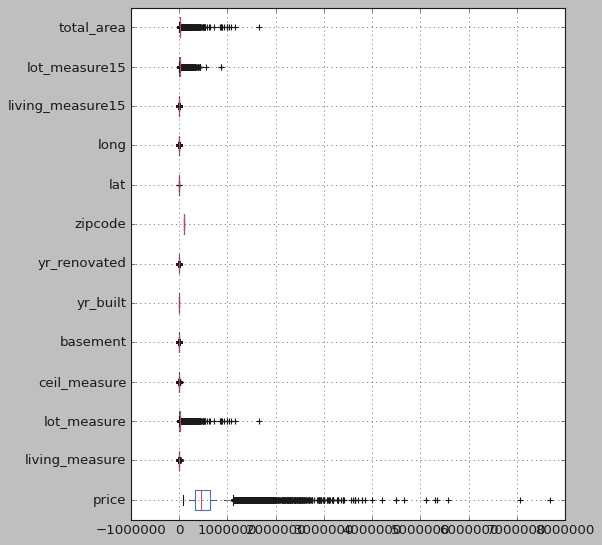

In [58]:
#### Check the spread of the data using boxplot for the continuous variables.
# construct box plot for continuous variables

plt.figure(figsize=(7,8))
data.boxplot(vert=0)
plt.show()

####cid columns is droped, zipcode, lat and yr_built have #### No possible outliers are present here, so we will use mean to impute null values in this column


#All other variables have possible ouliers and hence median would be used for imputation

In [59]:
# impute=["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "yr_built", "zipcode", "furnished", "basement", "yr_renovated"]


In [60]:
# for i in impute:
#     data[i].fillna(data[i].median(),inplace=True)

In [61]:
data.isnull().sum()

dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [62]:
data.head()

dayhours   price room_bed room_bath  living_measure  lot_measure ceil  \
0 2015-04-27  600000      4.0      1.75          3050.0       9440.0    1   
1 2015-03-17  190000      2.0       1.0           670.0       3101.0    1   
2 2014-08-20  735000      4.0      2.75          3040.0       2415.0    2   
3 2014-10-10  257000      3.0       2.5          1740.0       3721.0    2   
4 2015-02-18  450000      2.0       1.0          1120.0       4590.0    1   

  coast sight condition quality  ceil_measure  basement  yr_built  \
0     0   0.0         3     8.0        1800.0    1250.0      1966   
1     0   0.0         4     6.0         670.0       0.0      1948   
2     1   4.0         3     8.0        3040.0       0.0      1966   
3     0   0.0         3     8.0        1740.0       0.0      2009   
4     0   0.0         3     7.0        1120.0       0.0      1924   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0             0    98034  47.7228 -122.183            2020.0         8660.0   
1             0    98118  47.5546 -122.274            1660.0         4100.0   
2             0    98118  47.5188 -122.256            2620.0         2433.0   
3             0    98002  47.3363 -122.213            2030.0         3794.0   
4             0    98118  47.5663 -122.285            1120.0         5100.0   

  furnished  total_area  
0       0.0     12490.0  
1       0.0      3771.0  
2       0.0      5455.0  
3       0.0      5461.0  
4       0.0      5710.0

In [63]:
## Recheck the info

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21471 non-null  datetime64[ns]
 1   price             21471 non-null  int64         
 2   room_bed          21471 non-null  object        
 3   room_bath         21471 non-null  object        
 4   living_measure    21471 non-null  float64       
 5   lot_measure       21471 non-null  float64       
 6   ceil              21471 non-null  object        
 7   coast             21471 non-null  object        
 8   sight             21471 non-null  object        
 9   condition         21471 non-null  object        
 10  quality           21471 non-null  object        
 11  ceil_measure      21471 non-null  float64       
 12  basement          21471 non-null  float64       
 13  yr_built          21471 non-null  int64         
 14  yr_renovated      2147

<Axes: xlabel='dayhours', ylabel='Density'>

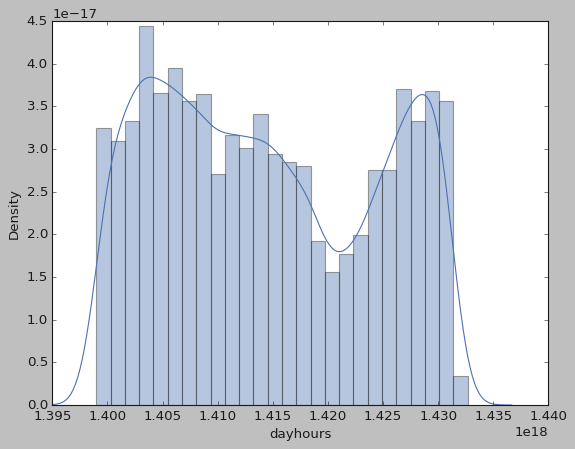

In [64]:
sns.distplot(data.dayhours)

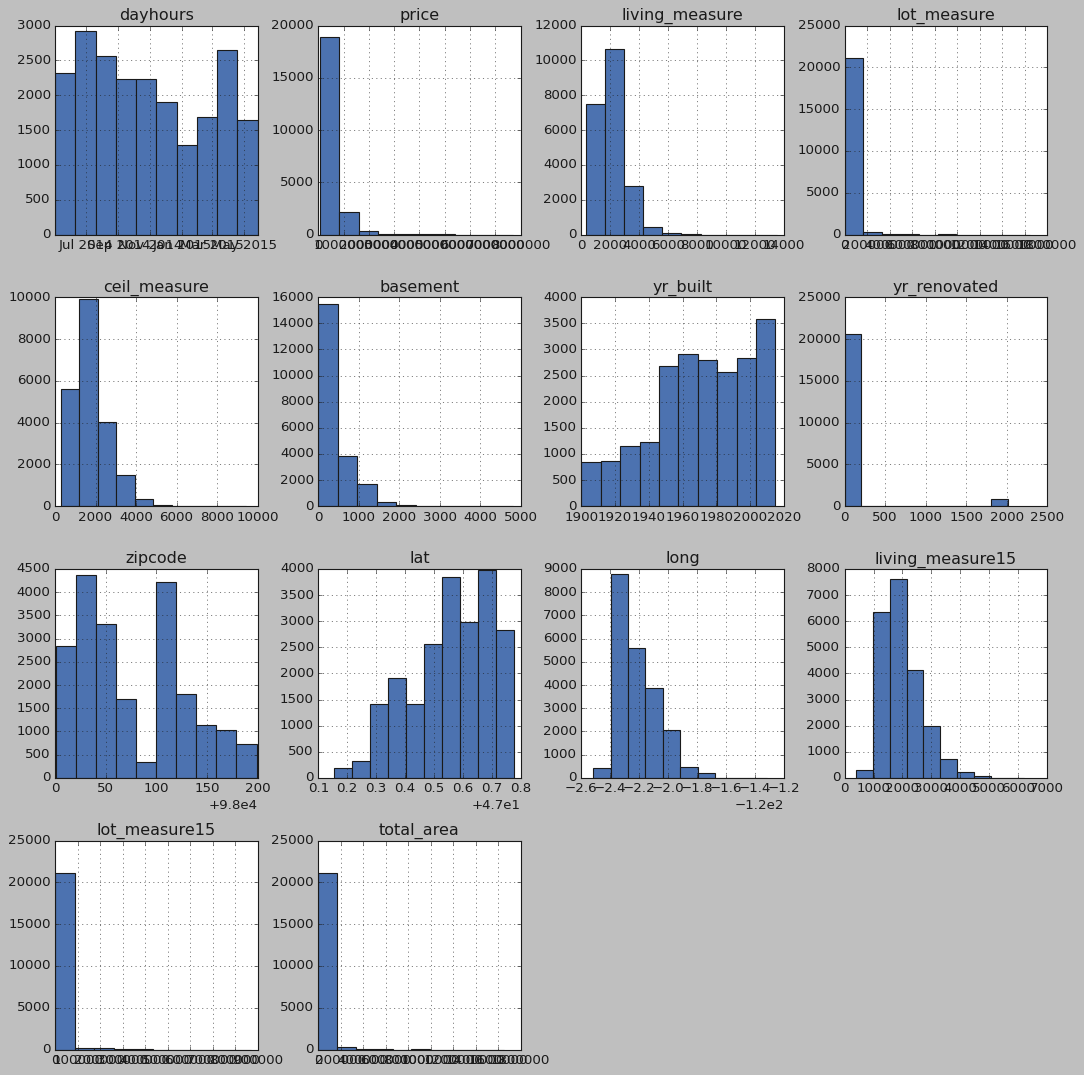

In [65]:
# To plot histogram

data.iloc[:,0:22].hist(figsize=(16,16))
plt.show()


In [66]:
# cat=[]
# num=[]
# for i in data.columns:
#     if data[i].dtype=="object":
#         cat.append(i)
#     else:
#         num.append(i)
# print(cat)
# print(num)


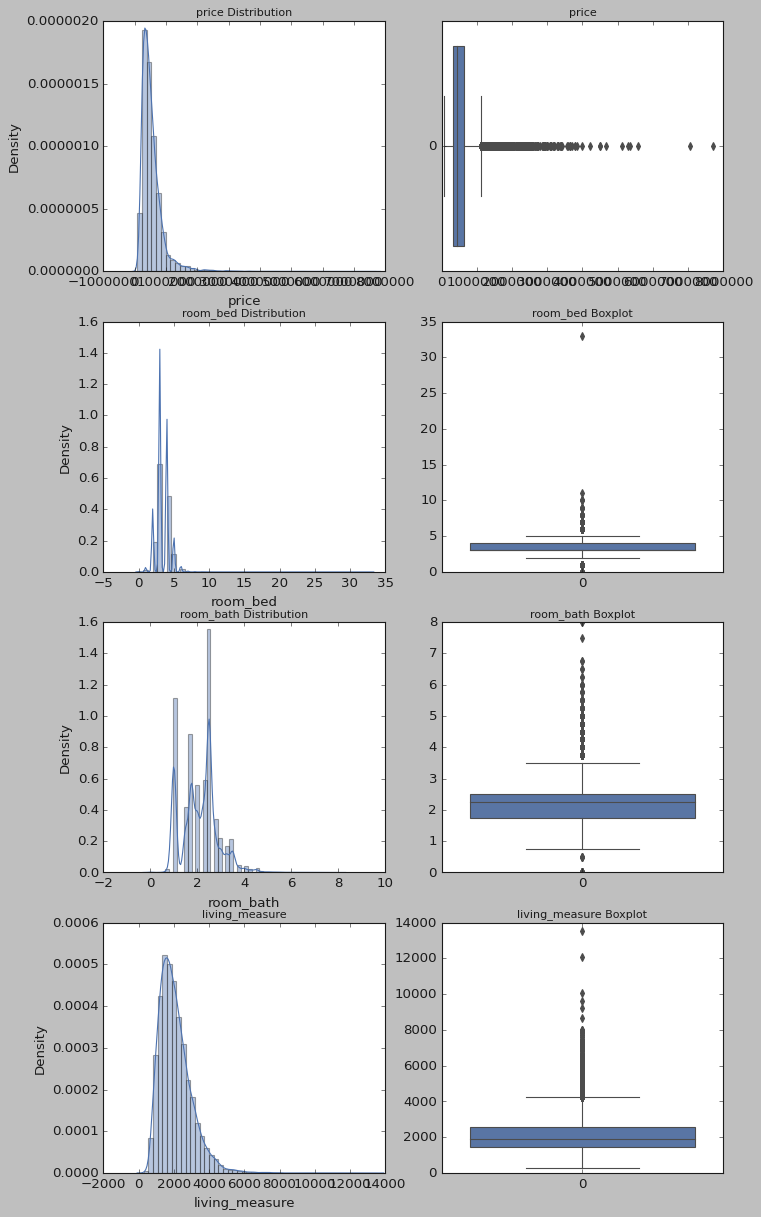

In [67]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(data['price'] , ax=axes[0][0])
a.set_title("price Distribution",fontsize=10)

a = sns.boxplot(data['price'] , orient = "h" , ax=axes[0][1])
a.set_title("price",fontsize=10)

a = sns.distplot(data['room_bed'] , ax=axes[1][0])
a.set_title("room_bed Distribution",fontsize=10)

a = sns.boxplot(data['room_bed'] , orient = "v" , ax=axes[1][1])
a.set_title("room_bed Boxplot",fontsize=10)

a = sns.distplot(data['room_bath'] , ax=axes[2][0])
a.set_title("room_bath Distribution",fontsize=10)

a = sns.boxplot(data['room_bath'] , orient = "v" , ax=axes[2][1])
a.set_title("room_bath Boxplot",fontsize=10)

a = sns.distplot(data['living_measure'] , ax=axes[3][0])
a.set_title("living_measure",fontsize=10)

a = sns.boxplot(data['living_measure'] , orient = "v" , ax=axes[3][1])
a.set_title("living_measure Boxplot",fontsize=10)

plt.show()


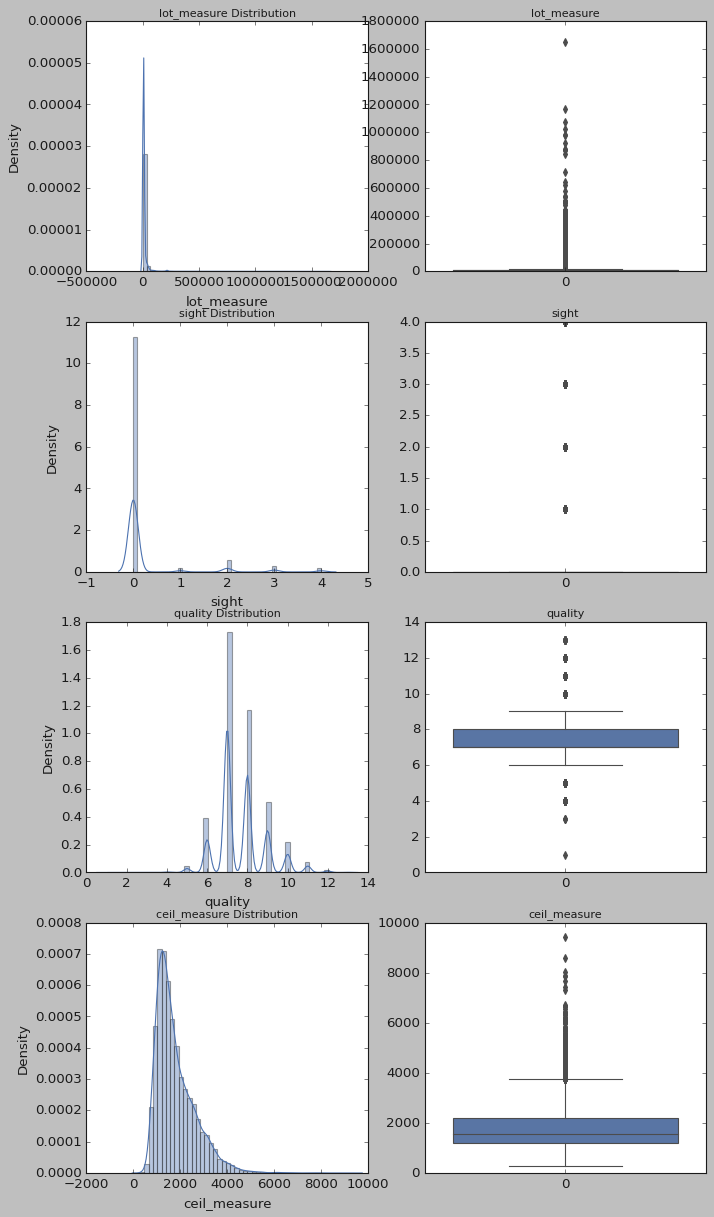

In [68]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(data['lot_measure'] , ax=axes[0][0])
a.set_title("lot_measure Distribution",fontsize=10)

a = sns.boxplot(data['lot_measure'] , orient = "v" , ax=axes[0][1])
a.set_title("lot_measure",fontsize=10)

a = sns.distplot(data['sight'] , ax=axes[1][0])
a.set_title("sight Distribution",fontsize=10)

a = sns.boxplot(data['sight'] , orient = "v" , ax=axes[1][1])
a.set_title("sight",fontsize=10)

a = sns.distplot(data['quality'] , ax=axes[2][0])
a.set_title("quality Distribution",fontsize=10)

a = sns.boxplot(data['quality'] , orient = "v" , ax=axes[2][1])
a.set_title("quality",fontsize=10)

a = sns.distplot(data['ceil_measure'] , ax=axes[3][0])
a.set_title("ceil_measure Distribution",fontsize=10)

a = sns.boxplot(data['ceil_measure'] , orient = "v" , ax=axes[3][1])
a.set_title("ceil_measure",fontsize=10)

plt.show()


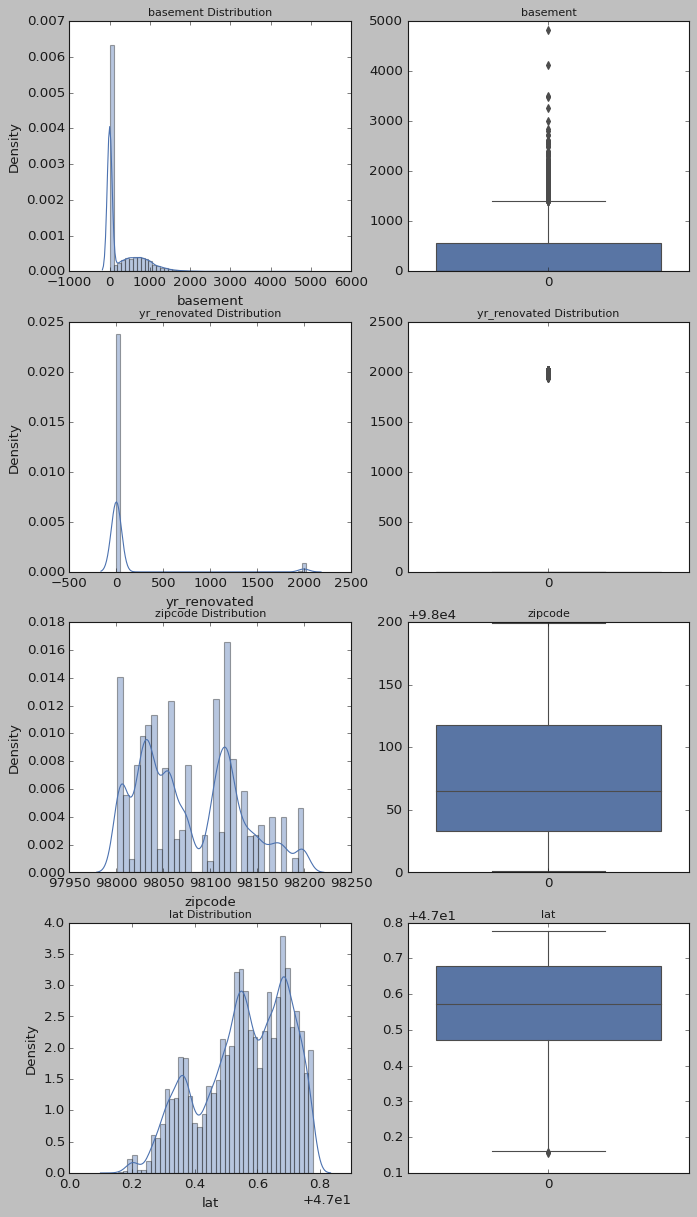

In [69]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)
a = sns.distplot(data['basement'] , ax=axes[0][0])
a.set_title("basement Distribution",fontsize=10)

a = sns.boxplot(data['basement'] , orient = "v" , ax=axes[0][1])
a.set_title("basement",fontsize=10)

a = sns.distplot(data['yr_renovated'] , ax=axes[1][0])
a.set_title("yr_renovated Distribution",fontsize=10)

a = sns.boxplot(data['yr_renovated'] , orient = "v" , ax=axes[1][1])
a.set_title("yr_renovated Distribution",fontsize=10)

a = sns.distplot(data['zipcode'] , ax=axes[2][0])
a.set_title("zipcode Distribution",fontsize=10)

a = sns.boxplot(data['zipcode'] , orient = "v" , ax=axes[2][1])
a.set_title("zipcode",fontsize=10)

a = sns.distplot(data['lat'] , ax=axes[3][0])
a.set_title("lat Distribution",fontsize=10)

a = sns.boxplot(data['lat'] , orient = "v" , ax=axes[3][1])
a.set_title("lat",fontsize=10)

plt.show()


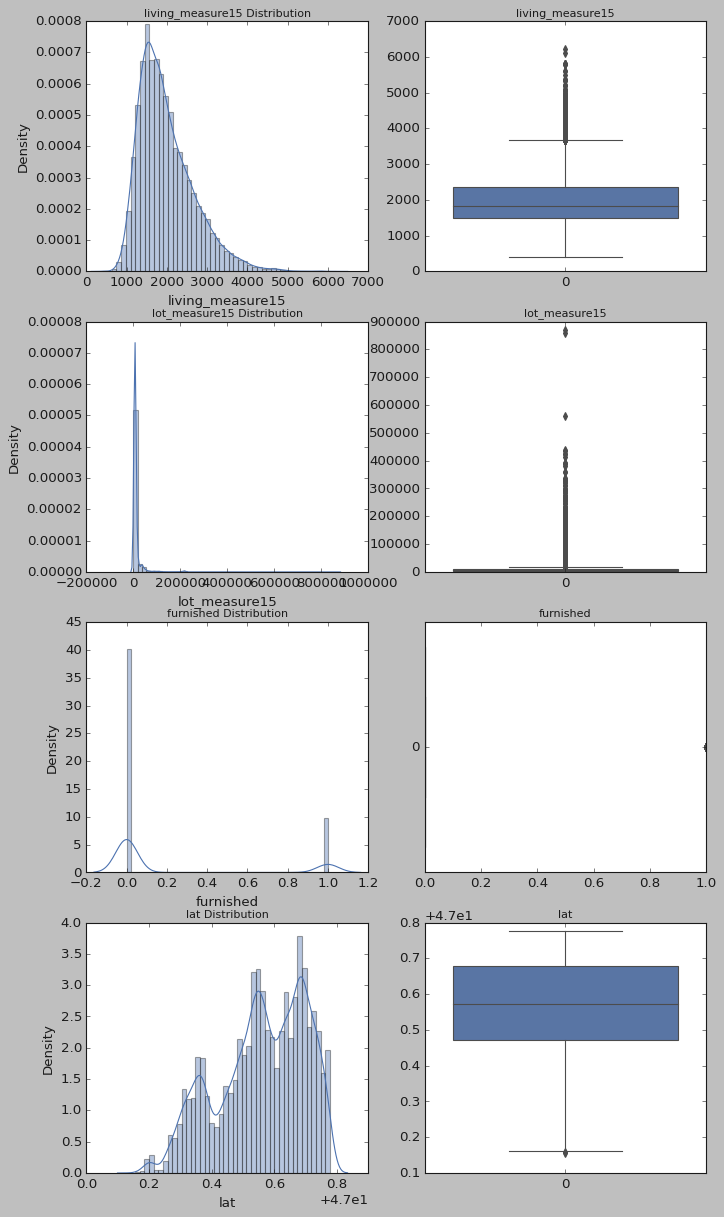

In [70]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,18)

a = sns.distplot(data['living_measure15'] , ax=axes[0][0])
a.set_title("living_measure15 Distribution",fontsize=10)

a = sns.boxplot(data['living_measure15'] , orient = "v" , ax=axes[0][1])
a.set_title("living_measure15",fontsize=10)

a = sns.distplot(data['lot_measure15'] , ax=axes[1][0])
a.set_title("lot_measure15 Distribution",fontsize=10)

a = sns.boxplot(data['lot_measure15'] , orient = "v" , ax=axes[1][1])
a.set_title("lot_measure15",fontsize=10)

a = sns.distplot(data['furnished'] , ax=axes[2][0])
a.set_title("furnished Distribution",fontsize=10)

a = sns.boxplot(data['furnished'] , orient = "h" , ax=axes[2][1])
a.set_title("furnished",fontsize=10)

a = sns.distplot(data['lat'] , ax=axes[3][0])
a.set_title("lat Distribution",fontsize=10)

a = sns.boxplot(data['lat'] , orient = "v" , ax=axes[3][1])
a.set_title("lat",fontsize=10)

plt.show()


**There are some possible outliers and the same would be treated accordingly. Skewness is not observed in the continuous variables**

###  Bivariate and Multivariate Analysis

<Axes: xlabel='price', ylabel='room_bed'>

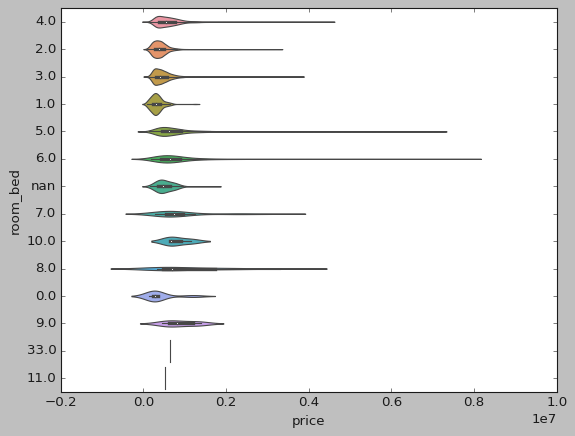

In [71]:
# Plotting scatter plot
sns.violinplot(data=data, x='price', y='room_bed')


<Axes: xlabel='price', ylabel='room_bath'>

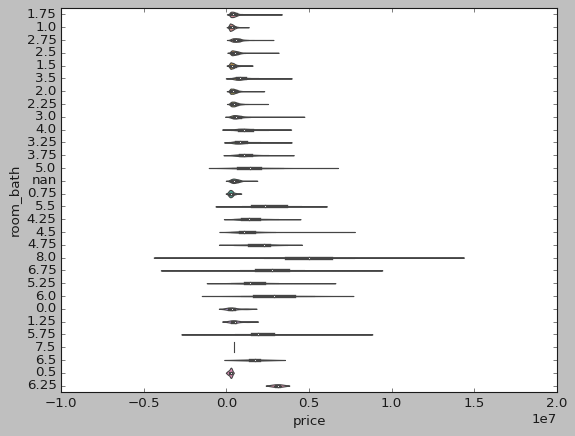

In [72]:
# Plotting scatter plot
sns.violinplot(data=data, x='price', y='room_bath')


<Axes: xlabel='price', ylabel='sight'>

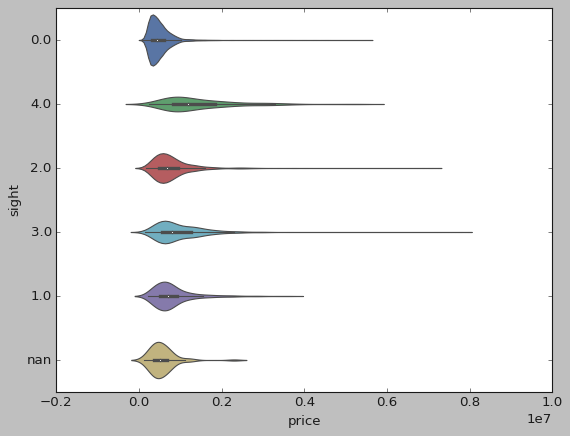

In [73]:
# Plotting scatter plot
sns.violinplot(data=data, x='price', y='sight')


<Axes: xlabel='price', ylabel='condition'>

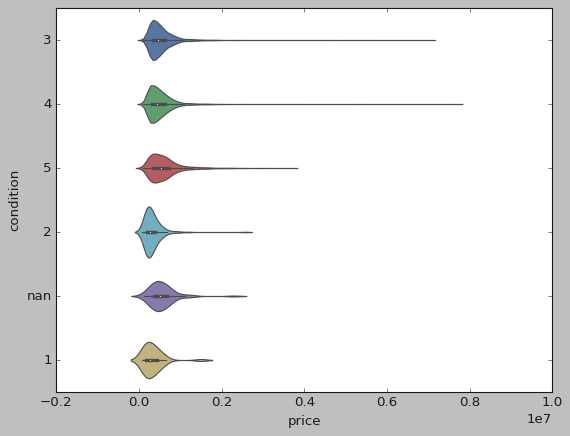

In [74]:
# Plotting scatter plot
sns.violinplot(data=data, x='price', y='condition')


<Axes: xlabel='price', ylabel='quality'>

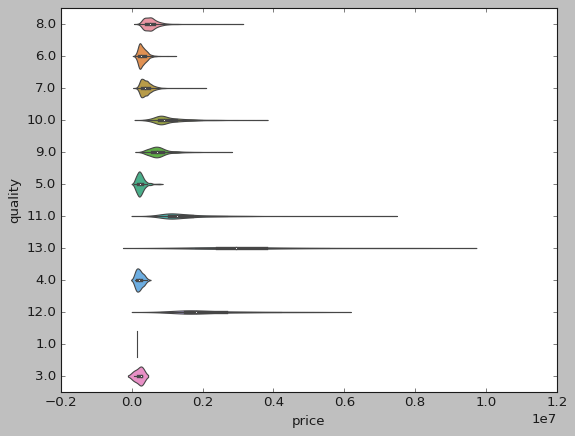

In [75]:
# Plotting scatter plot
sns.violinplot(data=data, x='price', y='quality')


In [76]:
print(num)

['dayhours', 'price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15', 'total_area']


In [77]:
#sns.distplot(data["price"],data['living_measure'])

In [78]:
# plt.figure(figsize=(5,5))
# sns.stripplot(data["price"], data['zipcode'], jitter=True)
# plt.show()

In [79]:
# plt.figure(figsize=(5,5))
# sns.boxplot(data["price"],data['quality'])


In [80]:
# To find correlation

corr = data.corr()
corr

price  living_measure  lot_measure  ceil_measure  \
price             1.000000        0.701280     0.088116      0.604102   
living_measure    0.701280        1.000000     0.171769      0.876108   
lot_measure       0.088116        0.171769     1.000000      0.182621   
ceil_measure      0.604102        0.876108     0.182621      1.000000   
basement          0.324385        0.434433     0.014749     -0.052810   
yr_built          0.053966        0.318328     0.052865      0.424377   
yr_renovated      0.126240        0.054803     0.007825      0.022888   
zipcode          -0.052758       -0.199945    -0.129509     -0.261826   
lat               0.308163        0.052443    -0.086687     -0.000929   
long              0.021556        0.240554     0.229103      0.344095   
living_measure15  0.585455        0.754310     0.144795      0.730078   
lot_measure15     0.081028        0.182721     0.715246      0.193560   
total_area        0.103305        0.193286     0.998214      0.201353   

                  basement  yr_built  yr_renovated   zipcode       lat  \
price             0.324385  0.053966      0.126240 -0.052758  0.308163   
living_measure    0.434433  0.318328      0.054803 -0.199945  0.052443   
lot_measure       0.014749  0.052865      0.007825 -0.129509 -0.086687   
ceil_measure     -0.052810  0.424377      0.022888 -0.261826 -0.000929   
basement          1.000000 -0.133222      0.071145  0.075337  0.110063   
yr_built         -0.133222  1.000000     -0.224580 -0.347047 -0.148646   
yr_renovated      0.071145 -0.224580      1.000000  0.064125  0.028669   
zipcode           0.075337 -0.347047      0.064125  1.000000  0.267774   
lat               0.110063 -0.148646      0.028669  0.267774  1.000000   
long             -0.144578  0.408711     -0.068011 -0.563908 -0.135936   
living_measure15  0.199067  0.325580     -0.002698 -0.278642  0.048345   
lot_measure15     0.016965  0.070826      0.008221 -0.147607 -0.086193   
total_area        0.024350  0.059728      0.009052 -0.133801 -0.084471   

                      long  living_measure15  lot_measure15  total_area  
price             0.021556          0.585455       0.081028    0.103305  
living_measure    0.240554          0.754310       0.182721    0.193286  
lot_measure       0.229103          0.144795       0.715246    0.998214  
ceil_measure      0.344095          0.730078       0.193560    0.201353  
basement         -0.144578          0.199067       0.016965    0.024350  
yr_built          0.408711          0.325580       0.070826    0.059728  
yr_renovated     -0.068011         -0.002698       0.008221    0.009052  
zipcode          -0.563908         -0.278642      -0.147607   -0.133801  
lat              -0.135936          0.048345      -0.086193   -0.084471  
long              1.000000          0.333121       0.254577    0.234039  
living_measure15  0.333121          1.000000       0.183798    0.161094  
lot_measure15     0.254577          0.183798       1.000000    0.718576  
total_area        0.234039          0.161094       0.718576    1.000000

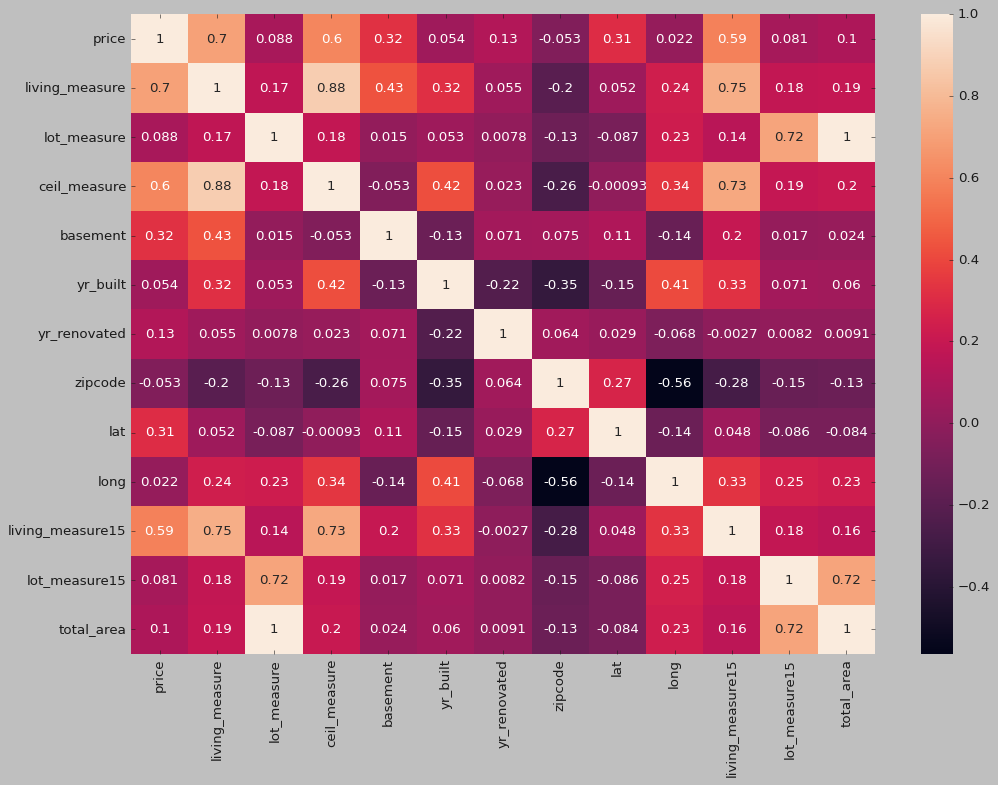

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

As expected, yr_built and ceil_measure are highly correlated. One of them would be dropped.

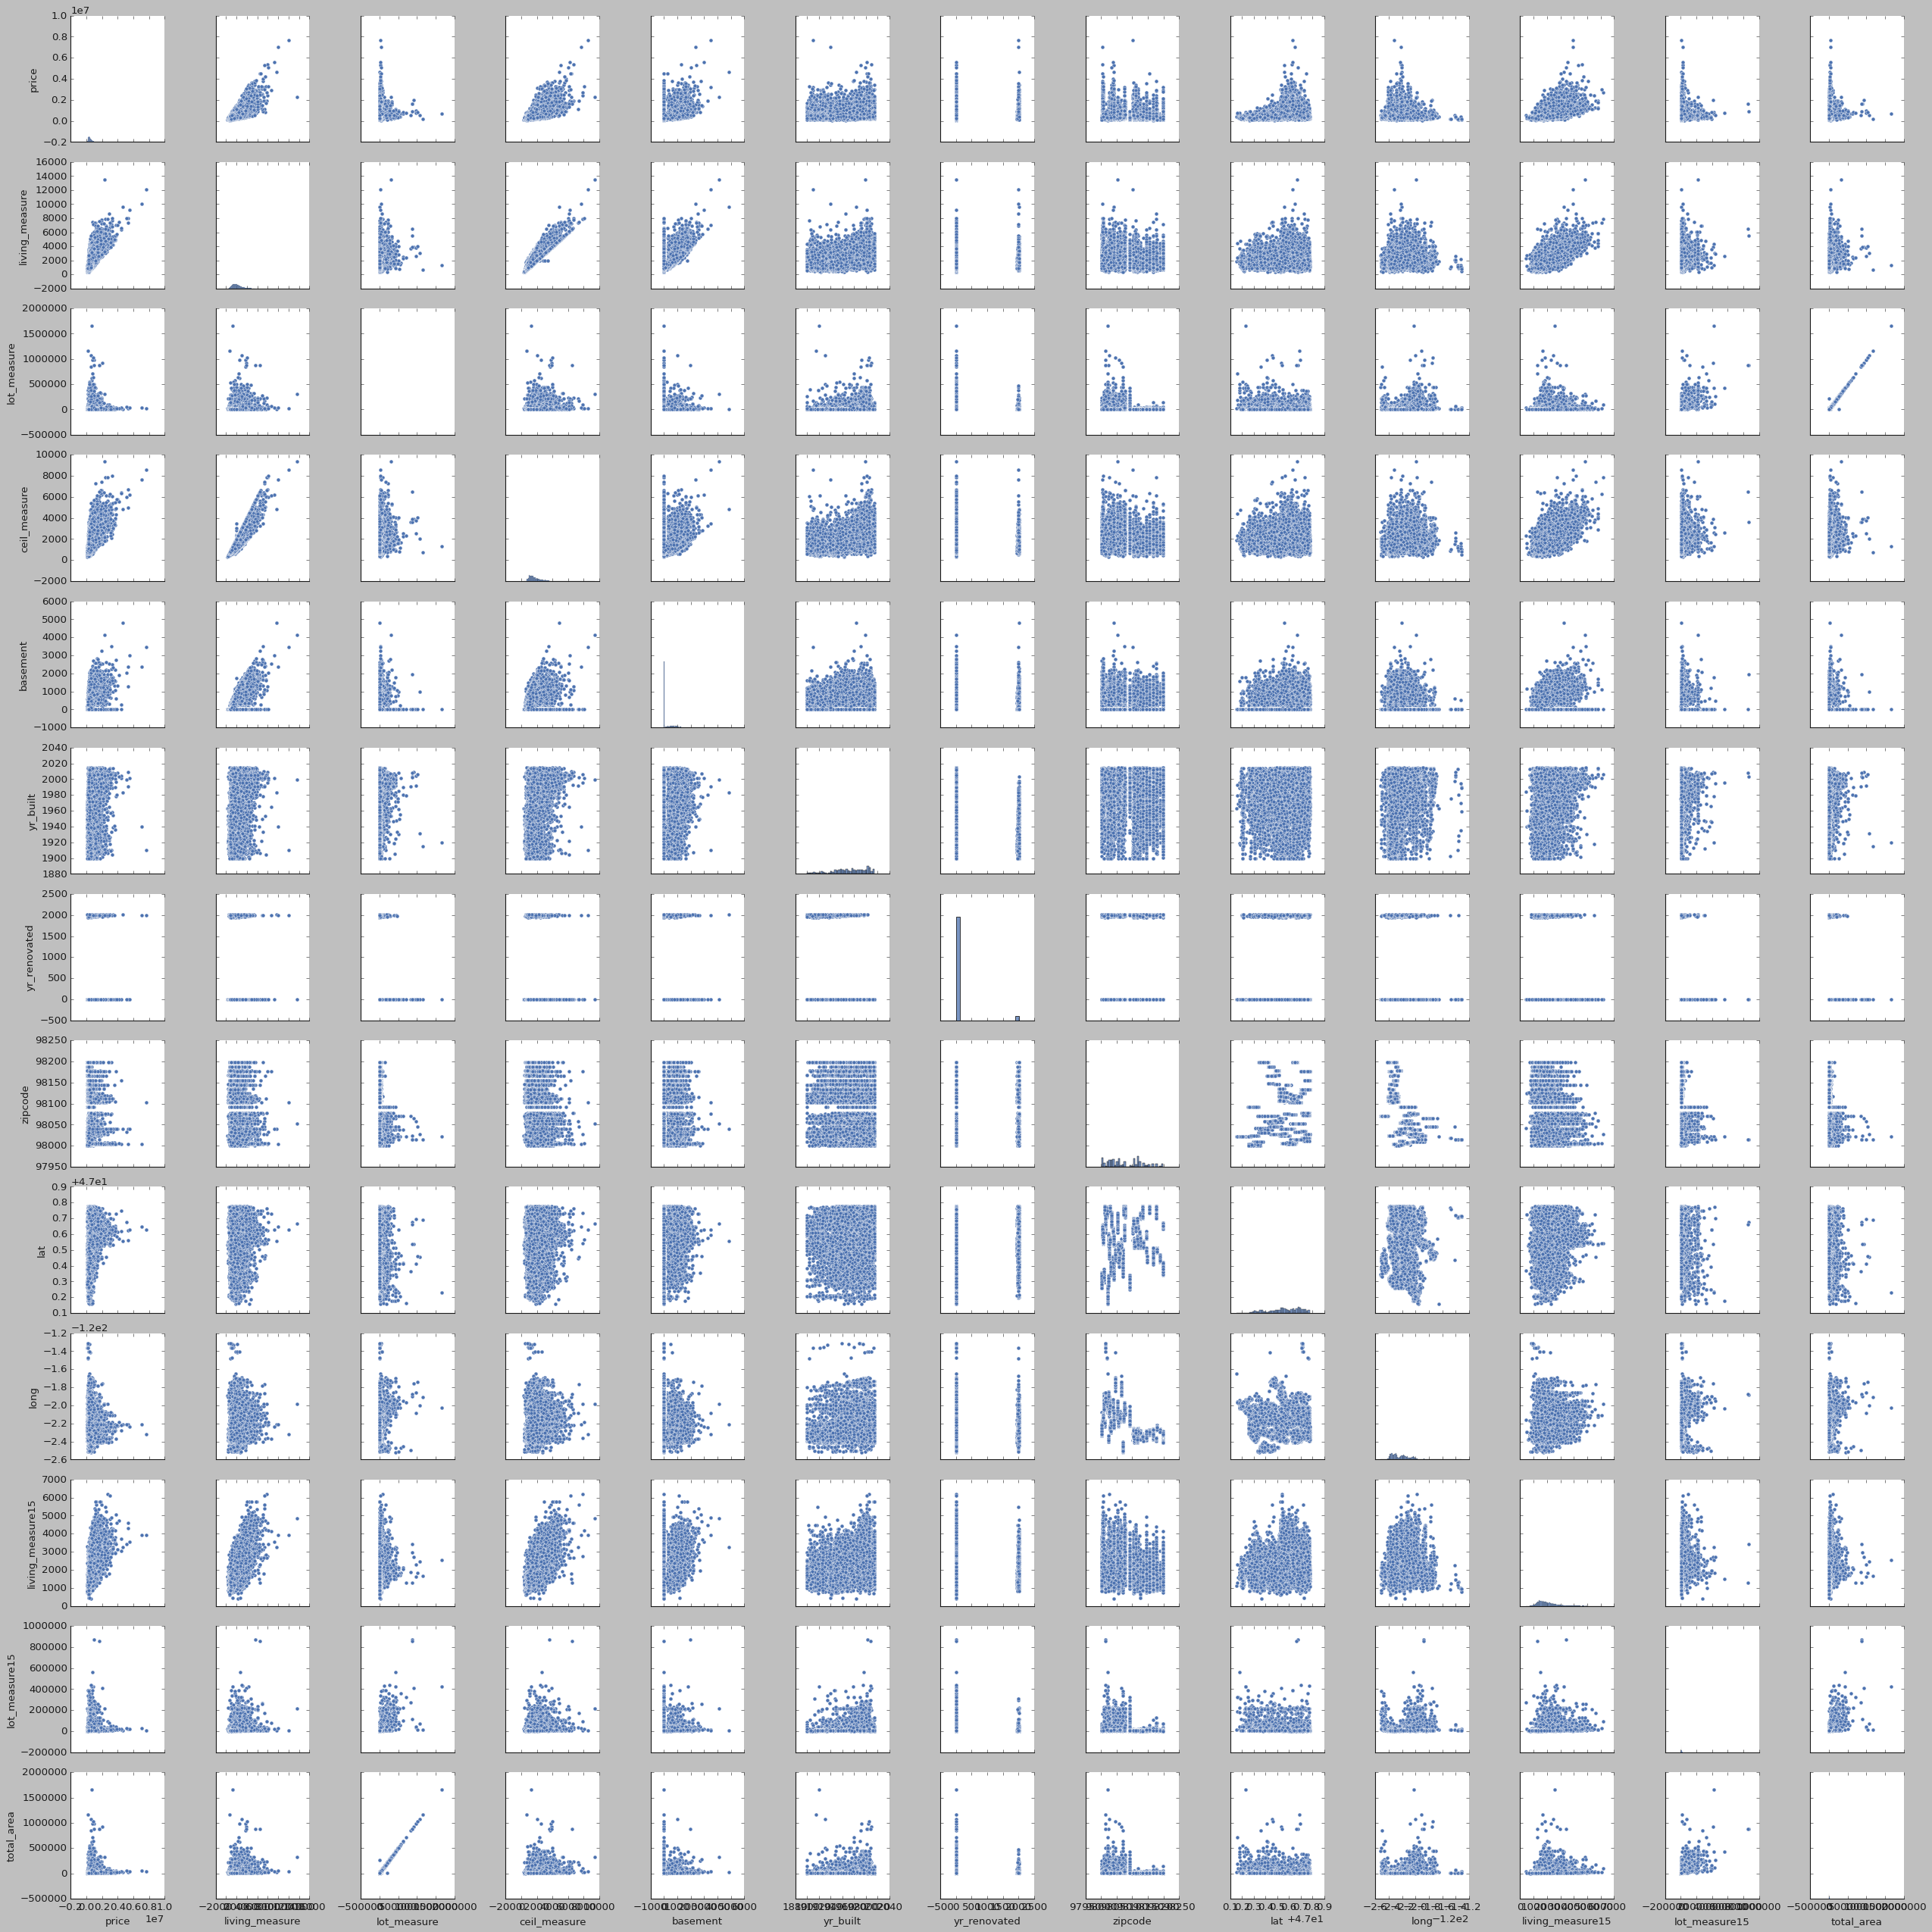

In [82]:
sns.pairplot(data)

**Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to
multicollinearity . This is done to ensure that we do not land in to dummy trap.**

In [83]:
data.head()

dayhours   price room_bed room_bath  living_measure  lot_measure ceil  \
0 2015-04-27  600000      4.0      1.75          3050.0       9440.0    1   
1 2015-03-17  190000      2.0       1.0           670.0       3101.0    1   
2 2014-08-20  735000      4.0      2.75          3040.0       2415.0    2   
3 2014-10-10  257000      3.0       2.5          1740.0       3721.0    2   
4 2015-02-18  450000      2.0       1.0          1120.0       4590.0    1   

  coast sight condition quality  ceil_measure  basement  yr_built  \
0     0   0.0         3     8.0        1800.0    1250.0      1966   
1     0   0.0         4     6.0         670.0       0.0      1948   
2     1   4.0         3     8.0        3040.0       0.0      1966   
3     0   0.0         3     8.0        1740.0       0.0      2009   
4     0   0.0         3     7.0        1120.0       0.0      1924   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0             0    98034  47.7228 -122.183            2020.0         8660.0   
1             0    98118  47.5546 -122.274            1660.0         4100.0   
2             0    98118  47.5188 -122.256            2620.0         2433.0   
3             0    98002  47.3363 -122.213            2030.0         3794.0   
4             0    98118  47.5663 -122.285            1120.0         5100.0   

  furnished  total_area  
0       0.0     12490.0  
1       0.0      3771.0  
2       0.0      5455.0  
3       0.0      5461.0  
4       0.0      5710.0

In [84]:
data.isnull().sum()

dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21471 non-null  datetime64[ns]
 1   price             21471 non-null  int64         
 2   room_bed          21471 non-null  object        
 3   room_bath         21471 non-null  object        
 4   living_measure    21471 non-null  float64       
 5   lot_measure       21471 non-null  float64       
 6   ceil              21471 non-null  object        
 7   coast             21471 non-null  object        
 8   sight             21471 non-null  object        
 9   condition         21471 non-null  object        
 10  quality           21471 non-null  object        
 11  ceil_measure      21471 non-null  float64       
 12  basement          21471 non-null  float64       
 13  yr_built          21471 non-null  int64         
 14  yr_renovated      2147

### Outlier Checks

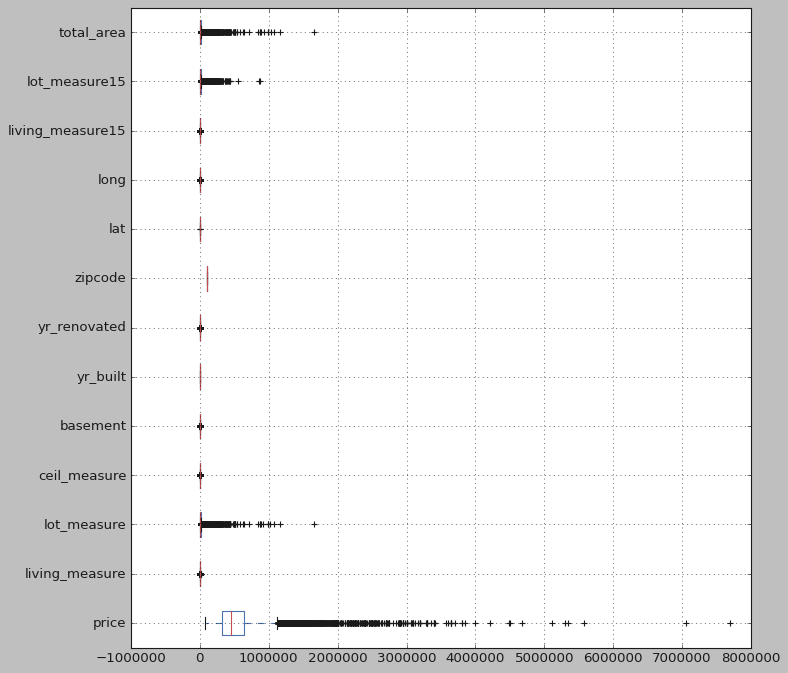

In [86]:
# construct box plot for continuous variables

plt.figure(figsize=(10,10))
data.boxplot(vert=0)
plt.show()

**Except for age, all other continuous variables have possible outliers**

In [87]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [88]:
for column in data[num]:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

<Axes: >

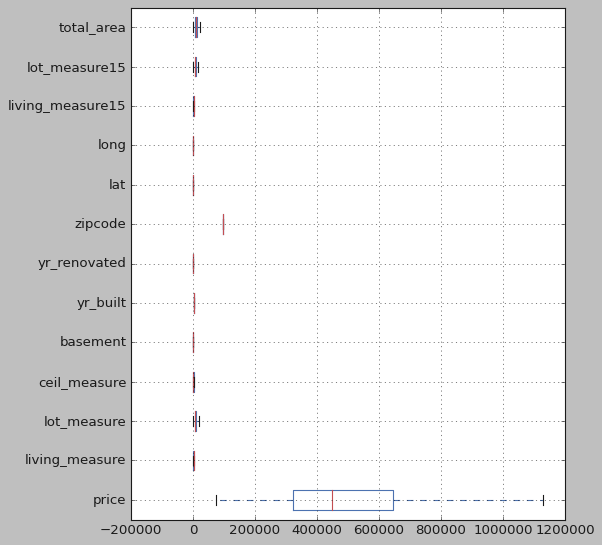

In [89]:
plt.figure(figsize=(7,8))
data.boxplot(vert=0)

In [90]:
print(num)

['dayhours', 'price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15', 'total_area']


In [91]:
num1 = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'yr_built', 'lat', 'living_measure15', 'lot_measure15', 'total_area']
# ### removing the correlated variable which was dropped earlier and target variable


In [92]:
print(cat)

['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished']


In [93]:
#TypeError: float() argument must be a string or a real number, not 'Timestamp'
#data.drop(["yr_renovated"], axis=1, inplace=True)
data.drop(["dayhours"], axis=1, inplace=True)

In [94]:
data['yr_renovated'].isnull().sum()

0

In [95]:
# import pandas as pd

# # Create a correlation matrix
# corr_matrix = data.corr()

# # Set the threshold for correlation coefficient
# threshold = 0.7

# # Find highly correlated variables
# high_corr_vars = []
# for i in range(len(corr_matrix.columns)):
#     for j in range(i+1, len(corr_matrix.columns)):
#         if abs(corr_matrix.iloc[i, j]) > threshold:
#             high_corr_vars.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# # Drop highly correlated variables
# data = data.drop(columns=[var[1] for var in high_corr_vars])


### Scaling the variables as continuous variables have different weightage using min-max technique


In [96]:
#data[num1] = data[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [97]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have a dataset stored in a DataFrame called 'data'
# Extract the features you want to scale into a separate DataFrame 'X'
X = data[num1]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled values
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)


#### get_dummies of the object variables

In [98]:
#data =pd.get_dummies(data, columns=["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "zipcode", "furnished", "basement", "yr_renovated"], drop_first=True)

In [99]:
data =pd.get_dummies(data, columns=["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "furnished"], drop_first=True)

In [100]:
#data =pd.get_dummies(data, columns=["room_bed", "room_bath", "ceil", "coast", "sight", "condition", "quality", "zipcode", "furnished"], drop_first=True)

#['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality', 'furnished']


In [101]:
data.drop(["room_bed_nan", "room_bath_nan", "ceil_nan", "sight_nan", "condition_nan", "furnished_nan"],axis=1, inplace=True)

In [102]:
# To find dummies and drop Frist column

# data=pd.get_dummies(data,drop_first=True)
data.head()

price  living_measure  lot_measure  ceil_measure  basement  yr_built  \
0  600000.0          3050.0       9440.0        1800.0    1250.0    1966.0   
1  190000.0           670.0       3101.0         670.0       0.0    1948.0   
2  735000.0          3040.0       2415.0        3040.0       0.0    1966.0   
3  257000.0          1740.0       3721.0        1740.0       0.0    2009.0   
4  450000.0          1120.0       4590.0        1120.0       0.0    1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

   total_area  room_bed_1.0  room_bed_10.0  room_bed_11.0  room_bed_2.0  \
0     12490.0             0              0              0             0   
1      3771.0             0              0              0             1   
2      5455.0             0              0              0             0   
3      5461.0             0              0              0             0   
4      5710.0             0              0              0             1   

   room_bed_3.0  room_bed_33.0  room_bed_4.0  room_bed_5.0  room_bed_6.0  \
0             0              0             1             0             0   
1             0              0             0             0             0   
2             0              0             1             0             0   
3             1              0             0             0             0   
4             0              0             0             0             0   

   room_bed_7.0  room_bed_8.0  room_bed_9.0  room_bath_0.5  room_bath_0.75  \
0             0             0             0              0               0   
1             0             0             0              0               0   
2             0             0             0              0               0   
3             0             0             0              0               0   
4             0             0             0              0               0   

   room_bath_1.0  room_bath_1.25  room_bath_1.5  room_bath_1.75  \
0              0               0              0               1   
1              1               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              1               0              0               0   

   room_bath_2.0  room_bath_2.25  room_bath_2.5  room_bath_2.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               1   
3              0               0              1               0   
4              0               0              0               0   

   room_bath_3.0  room_bath_3.25  room_bath_3.5  room_bath_3.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   room_bath_4.0  room_bath_4.25  room_bath_4.5  room_bath_4.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   room_bath_5.0  room_bath_5.25  room_bath_5.5  room_bath_5.75  \
0     

In [103]:
data.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area', 'room_bed_1.0',
       'room_bed_10.0', 'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_33.0', 'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0',
       'room_bed_7.0', 'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5',
       'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
       'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
       'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5',
       'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5',
       'room_bath_6.75', 'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5',
       'ceil_2', 'ceil_2.5', 'ceil_3',

In [104]:
## Check if the variables have been scaled or not

data.head()

price  living_measure  lot_measure  ceil_measure  basement  yr_built  \
0  600000.0          3050.0       9440.0        1800.0    1250.0    1966.0   
1  190000.0           670.0       3101.0         670.0       0.0    1948.0   
2  735000.0          3040.0       2415.0        3040.0       0.0    1966.0   
3  257000.0          1740.0       3721.0        1740.0       0.0    2009.0   
4  450000.0          1120.0       4590.0        1120.0       0.0    1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

   total_area  room_bed_1.0  room_bed_10.0  room_bed_11.0  room_bed_2.0  \
0     12490.0             0              0              0             0   
1      3771.0             0              0              0             1   
2      5455.0             0              0              0             0   
3      5461.0             0              0              0             0   
4      5710.0             0              0              0             1   

   room_bed_3.0  room_bed_33.0  room_bed_4.0  room_bed_5.0  room_bed_6.0  \
0             0              0             1             0             0   
1             0              0             0             0             0   
2             0              0             1             0             0   
3             1              0             0             0             0   
4             0              0             0             0             0   

   room_bed_7.0  room_bed_8.0  room_bed_9.0  room_bath_0.5  room_bath_0.75  \
0             0             0             0              0               0   
1             0             0             0              0               0   
2             0             0             0              0               0   
3             0             0             0              0               0   
4             0             0             0              0               0   

   room_bath_1.0  room_bath_1.25  room_bath_1.5  room_bath_1.75  \
0              0               0              0               1   
1              1               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              1               0              0               0   

   room_bath_2.0  room_bath_2.25  room_bath_2.5  room_bath_2.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               1   
3              0               0              1               0   
4              0               0              0               0   

   room_bath_3.0  room_bath_3.25  room_bath_3.5  room_bath_3.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   room_bath_4.0  room_bath_4.25  room_bath_4.5  room_bath_4.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   room_bath_5.0  room_bath_5.25  room_bath_5.5  room_bath_5.75  \
0     

In [105]:
data.head()

price  living_measure  lot_measure  ceil_measure  basement  yr_built  \
0  600000.0          3050.0       9440.0        1800.0    1250.0    1966.0   
1  190000.0           670.0       3101.0         670.0       0.0    1948.0   
2  735000.0          3040.0       2415.0        3040.0       0.0    1966.0   
3  257000.0          1740.0       3721.0        1740.0       0.0    2009.0   
4  450000.0          1120.0       4590.0        1120.0       0.0    1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

   total_area  room_bed_1.0  room_bed_10.0  room_bed_11.0  room_bed_2.0  \
0     12490.0             0              0              0             0   
1      3771.0             0              0              0             1   
2      5455.0             0              0              0             0   
3      5461.0             0              0              0             0   
4      5710.0             0              0              0             1   

   room_bed_3.0  room_bed_33.0  room_bed_4.0  room_bed_5.0  room_bed_6.0  \
0             0              0             1             0             0   
1             0              0             0             0             0   
2             0              0             1             0             0   
3             1              0             0             0             0   
4             0              0             0             0             0   

   room_bed_7.0  room_bed_8.0  room_bed_9.0  room_bath_0.5  room_bath_0.75  \
0             0             0             0              0               0   
1             0             0             0              0               0   
2             0             0             0              0               0   
3             0             0             0              0               0   
4             0             0             0              0               0   

   room_bath_1.0  room_bath_1.25  room_bath_1.5  room_bath_1.75  \
0              0               0              0               1   
1              1               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              1               0              0               0   

   room_bath_2.0  room_bath_2.25  room_bath_2.5  room_bath_2.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               1   
3              0               0              1               0   
4              0               0              0               0   

   room_bath_3.0  room_bath_3.25  room_bath_3.5  room_bath_3.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   room_bath_4.0  room_bath_4.25  room_bath_4.5  room_bath_4.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   room_bath_5.0  room_bath_5.25  room_bath_5.5  room_bath_5.75  \
0     

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21612
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21471 non-null  float64
 1   living_measure    21471 non-null  float64
 2   lot_measure       21471 non-null  float64
 3   ceil_measure      21471 non-null  float64
 4   basement          21471 non-null  float64
 5   yr_built          21471 non-null  float64
 6   yr_renovated      21471 non-null  float64
 7   zipcode           21471 non-null  float64
 8   lat               21471 non-null  float64
 9   long              21471 non-null  float64
 10  living_measure15  21471 non-null  float64
 11  lot_measure15     21471 non-null  float64
 12  total_area        21471 non-null  float64
 13  room_bed_1.0      21471 non-null  uint8  
 14  room_bed_10.0     21471 non-null  uint8  
 15  room_bed_11.0     21471 non-null  uint8  
 16  room_bed_2.0      21471 non-null  uint8 

In [107]:
data.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area', 'room_bed_1.0',
       'room_bed_10.0', 'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_33.0', 'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0',
       'room_bed_7.0', 'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5',
       'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
       'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
       'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5',
       'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5',
       'room_bath_6.75', 'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5',
       'ceil_2', 'ceil_2.5', 'ceil_3',

In [108]:
# # Assuming your DataFrame is named 'data'
# data['price'] = data['price'].astype('int64')

# # Convert other float columns to int64
# float_columns = data.select_dtypes(include=['float64']).columns
# data[float_columns] = data[float_columns].astype('int64')


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21471 entries, 0 to 21612
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21471 non-null  float64
 1   living_measure    21471 non-null  float64
 2   lot_measure       21471 non-null  float64
 3   ceil_measure      21471 non-null  float64
 4   basement          21471 non-null  float64
 5   yr_built          21471 non-null  float64
 6   yr_renovated      21471 non-null  float64
 7   zipcode           21471 non-null  float64
 8   lat               21471 non-null  float64
 9   long              21471 non-null  float64
 10  living_measure15  21471 non-null  float64
 11  lot_measure15     21471 non-null  float64
 12  total_area        21471 non-null  float64
 13  room_bed_1.0      21471 non-null  uint8  
 14  room_bed_10.0     21471 non-null  uint8  
 15  room_bed_11.0     21471 non-null  uint8  
 16  room_bed_2.0      21471 non-null  uint8 

In [110]:
import statsmodels.api as SM
import statsmodels.formula.api as SM
##from sklearn.metrics import mean_square_error
import statsmodels.api as st


In [111]:
#check for Multicolinearity

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=SM.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)


In [112]:
vif_cal(input_data=data[['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area', 'room_bed_1.0',
       'room_bed_10.0', 'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_33.0', 'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0',
       'room_bed_7.0', 'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5',
       'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
       'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
       'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5',
       'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5',
       'room_bath_6.75', 'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5',
       'ceil_2', 'ceil_2.5', 'ceil_3', 'ceil_3.5', 'coast_1', 'sight_1.0',
       'sight_2.0', 'sight_3.0', 'sight_4.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'quality_10.0', 'quality_11.0',
       'quality_12.0', 'quality_13.0', 'quality_3.0', 'quality_4.0',
       'quality_5.0', 'quality_6.0', 'quality_7.0', 'quality_8.0',
       'quality_9.0', 'furnished_1.0']])


price  VIF =  4.25
living_measure  VIF =  83.69
lot_measure  VIF =  138.92
ceil_measure  VIF =  73.04
basement  VIF =  20.6
yr_built  VIF =  2.97
yr_renovated  VIF =  nan
zipcode  VIF =  1.74
lat  VIF =  1.61
long  VIF =  1.96
living_measure15  VIF =  3.29
lot_measure15  VIF =  6.23
total_area  VIF =  153.64
room_bed_1.0  VIF =  26.61
room_bed_10.0  VIF =  1.43
room_bed_11.0  VIF =  1.14
room_bed_2.0  VIF =  321.14
room_bed_3.0  VIF =  714.7
room_bed_33.0  VIF =  1.14
room_bed_4.0  VIF =  626.27
room_bed_5.0  VIF =  198.64
room_bed_6.0  VIF =  36.68
room_bed_7.0  VIF =  6.17
room_bed_8.0  VIF =  2.65
room_bed_9.0  VIF =  2.03
room_bath_0.5  VIF =  1.57
room_bath_0.75  VIF =  11.09
room_bath_1.0  VIF =  446.37
room_bath_1.25  VIF =  2.28
room_bath_1.5  VIF =  190.93
room_bath_1.75  VIF =  370.43
room_bath_2.0  VIF =  247.98
room_bath_2.25  VIF =  262.19
room_bath_2.5  VIF =  570.78
room_bath_2.75  VIF =  158.98
room_bath_3.0  VIF =  103.28
room_bath_3.25  VIF =  82.33
room_bath_3.5  VIF

In [113]:
# vif_cal(input_data=data[float_columns])

Multicollinearity exist as VIF>5

In [114]:
# import pandas as pd
# import numpy as np
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Select the columns for which you want to calculate VIF
# columns = ['living_measure', 'lot_measure', 'ceil_measure', 'yr_built', 'lat', 'living_measure15', 'lot_measure15', 'total_area']

# # Calculate VIF for each variable
# vif = pd.DataFrame()
# vif["Variable"] = columns
# vif["VIF"] = [variance_inflation_factor(data[columns].values, i) for i in range(len(columns))]

# # Print the VIF values
# print(vif)

# # Set a threshold for the maximum acceptable VIF value
# threshold = 2

# # Identify variables with VIF above the threshold
# high_vif_vars = vif[vif['VIF'] > threshold]['Variable'].values

# # Remove the highly correlated variables from the dataset
# df_filtered = data.drop(high_vif_vars, axis=1)

# # Print the filtered dataset
# print(df_filtered.head())


In [115]:
data.columns

Index(['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area', 'room_bed_1.0',
       'room_bed_10.0', 'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_33.0', 'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0',
       'room_bed_7.0', 'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5',
       'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
       'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
       'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5',
       'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5',
       'room_bath_6.75', 'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5',
       'ceil_2', 'ceil_2.5', 'ceil_3',

In [116]:
# Counting the number of columns
num_columns = data.shape[1]

# Printing the number of columns
print("Number of columns:", num_columns)


Number of columns: 79


In [117]:
columns = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 'basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'total_area', 'room_bed_1.0',
       'room_bed_10.0', 'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0',
       'room_bed_33.0', 'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0',
       'room_bed_7.0', 'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5',
       'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
       'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
       'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
       'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
       'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5',
       'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5',
       'room_bath_6.75', 'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5',
       'ceil_2', 'ceil_2.5', 'ceil_3', 'ceil_3.5', 'coast_1', 'sight_1.0',
       'sight_2.0', 'sight_3.0', 'sight_4.0', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'quality_10.0', 'quality_11.0',
       'quality_12.0', 'quality_13.0', 'quality_3.0', 'quality_4.0',
       'quality_5.0', 'quality_6.0', 'quality_7.0', 'quality_8.0',
       'quality_9.0', 'furnished_1.0']

In [118]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming you have your data stored in a DataFrame called 'data'
# Extract the target variable (price) and predictor variables (features)
target = data['price']
predictors = data[['living_measure', 'lot_measure', 'ceil_measure', 'basement',
                 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                 'living_measure15', 'lot_measure15', 'total_area', 'room_bed_1.0',
                 'room_bed_10.0', 'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0',
                 'room_bed_33.0', 'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0',
                 'room_bed_7.0', 'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5',
                 'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
                 'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
                 'room_bath_2.75', 'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5',
                 'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
                 'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5',
                 'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5',
                 'room_bath_6.75', 'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5',
                 'ceil_2', 'ceil_2.5', 'ceil_3', 'ceil_3.5', 'coast_1', 'sight_1.0',
                 'sight_2.0', 'sight_3.0', 'sight_4.0', 'condition_2', 'condition_3',
                 'condition_4', 'condition_5', 'quality_10.0', 'quality_11.0',
                 'quality_12.0', 'quality_13.0', 'quality_3.0', 'quality_4.0',
                 'quality_5.0', 'quality_6.0', 'quality_7.0', 'quality_8.0',
                 'quality_9.0', 'furnished_1.0']]

predictors = sm.add_constant(predictors)


In [119]:
model = sm.OLS(target, predictors)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     902.4
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:55:28   Log-Likelihood:            -2.8180e+05
No. Observations:               21471   AIC:                         5.638e+05
Df Residuals:                   21393   BIC:                         5.644e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.775e+06   1.83e+06  

In [120]:
predictors = data[['living_measure', 'lot_measure', 'ceil_measure', 'basement',
                 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                 'living_measure15', 'lot_measure15', 'total_area', 'room_bed_1.0',
                 'room_bed_10.0', 'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0',
                 'room_bed_33.0', 'room_bed_4.0', 'room_bed_6.0',
                 'room_bed_7.0', 'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5',
                 'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
                 'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
                 'room_bath_2.75', 'room_bath_3.25', 'room_bath_3.5',
                 'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
                 'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5',
                 'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5',
                 'room_bath_6.75', 'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5',
                 'ceil_2', 'ceil_2.5', 'ceil_3', 'ceil_3.5', 'coast_1', 'sight_1.0',
                 'sight_2.0', 'sight_3.0', 'sight_4.0', 'condition_2', 'condition_3',
                 'condition_4', 'condition_5', 'quality_10.0', 'quality_11.0',
                 'quality_12.0', 'quality_13.0', 'quality_3.0',
                 'quality_6.0', 'quality_7.0', 'quality_8.0','quality_9.0']]

predictors = sm.add_constant(predictors)
# droping the following values as p-value>5 'quality_5.0',  'quality_4.0', 'room_bath_3.0', 'room_bed_5.0', furnished_1.0', furnished_1.0',yr_renovated

In [121]:
vif_cal(input_data=data[['living_measure', 'lot_measure', 'ceil_measure', 'basement',
                 'yr_built', 'zipcode', 'lat', 'long',
                 'living_measure15', 'lot_measure15', 'total_area', 'room_bed_1.0',
                 'room_bed_10.0', 'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0',
                 'room_bed_33.0', 'room_bed_4.0', 'room_bed_6.0',
                 'room_bed_7.0', 'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5',
                 'room_bath_0.75', 'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5',
                 'room_bath_1.75', 'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5',
                 'room_bath_2.75', 'room_bath_3.25', 'room_bath_3.5',
                 'room_bath_3.75', 'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5',
                 'room_bath_4.75', 'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5',
                 'room_bath_5.75', 'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5',
                 'room_bath_6.75', 'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5',
                 'ceil_2', 'ceil_2.5', 'ceil_3', 'ceil_3.5', 'coast_1', 'sight_1.0',
                 'sight_2.0', 'sight_3.0', 'sight_4.0', 'condition_2', 'condition_3',
                 'condition_4', 'condition_5', 'quality_10.0', 'quality_11.0',
                 'quality_12.0', 'quality_13.0', 'quality_3.0',
                 'quality_6.0', 'quality_7.0', 'quality_8.0','quality_9.0']])


living_measure  VIF =  82.78
lot_measure  VIF =  136.9
ceil_measure  VIF =  72.91
basement  VIF =  20.56
yr_built  VIF =  2.76
zipcode  VIF =  1.72
lat  VIF =  1.21
long  VIF =  1.95
living_measure15  VIF =  3.22
lot_measure15  VIF =  6.22
total_area  VIF =  151.43
room_bed_1.0  VIF =  1.33
room_bed_10.0  VIF =  1.03
room_bed_11.0  VIF =  1.0
room_bed_2.0  VIF =  3.38
room_bed_3.0  VIF =  4.81
room_bed_33.0  VIF =  1.0
room_bed_4.0  VIF =  3.78
room_bed_6.0  VIF =  1.19
room_bed_7.0  VIF =  1.08
room_bed_8.0  VIF =  1.04
room_bed_9.0  VIF =  1.23
room_bath_0.5  VIF =  1.01
room_bath_0.75  VIF =  1.23
room_bath_1.0  VIF =  6.94
room_bath_1.25  VIF =  1.02
room_bath_1.5  VIF =  3.03
room_bath_1.75  VIF =  4.79
room_bath_2.0  VIF =  3.46
room_bath_2.25  VIF =  3.38
room_bath_2.5  VIF =  6.07
room_bath_2.75  VIF =  2.35
room_bath_3.25  VIF =  1.74
room_bath_3.5  VIF =  1.95
room_bath_3.75  VIF =  1.22
room_bath_4.0  VIF =  1.22
room_bath_4.25  VIF =  1.16
room_bath_4.5  VIF =  1.2
room_bat

In [122]:
# # Set a threshold for the maximum acceptable VIF value
# threshold = 5

# # Identify variables with VIF above the threshold
# high_vif_vars = vif[vif['VIF'] > threshold]['Variable'].values

# # Remove the highly correlated variables from the dataset
# data = data.drop(high_vif_vars, axis=1)

# # Print the filtered dataset
# print(data.head())

In [123]:
model = sm.OLS(target, predictors)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     965.1
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:55:48   Log-Likelihood:            -2.8180e+05
No. Observations:               21471   AIC:                         5.637e+05
Df Residuals:                   21398   BIC:                         5.643e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.796e+06   1.83e+06  

In [124]:
# import numpy as np

# # Assuming your dataset is stored in a DataFrame called "data"
# data['renovated'] = np.where(data['yr_renovated'] > 0, 1, 0)

# # Drop the original "yr_renovated" column if needed
# data = data.drop('yr_renovated', axis=1)

# # Print the updated dataset
# print(data.head())


In [125]:
# To treat the zeros in the "basement" and "yr_renovated" features, you can create a new binary indicator column
#where 1 represents the presence of a non-zero value and 0 represents the presence of a zero value.
# Assuming your dataset is stored in a DataFrame called "data"

# Treat the "basement" feature
data['basement_indicator'] = data['basement'].apply(lambda x: 0 if x == 0 else 1)

# Treat the "yr_renovated" feature
data['renovation_indicator'] = data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Print the updated dataset
print(data.head())


      price  living_measure  lot_measure  ceil_measure  basement  yr_built  \
0  600000.0          3050.0       9440.0        1800.0    1250.0    1966.0   
1  190000.0           670.0       3101.0         670.0       0.0    1948.0   
2  735000.0          3040.0       2415.0        3040.0       0.0    1966.0   
3  257000.0          1740.0       3721.0        1740.0       0.0    2009.0   
4  450000.0          1120.0       4590.0        1120.0       0.0    1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

   total_area  room_bed_1.0  room_bed_10.0  room_bed_11.

In [126]:
# Copy all the predictor variables into X dataframe
X = data.drop('price', axis=1)   ## Features

# Copy target into the y dataframe.
y = data['price']    ## Target

In [127]:
X.head()

living_measure  lot_measure  ceil_measure  basement  yr_built  \
0          3050.0       9440.0        1800.0    1250.0    1966.0   
1           670.0       3101.0         670.0       0.0    1948.0   
2          3040.0       2415.0        3040.0       0.0    1966.0   
3          1740.0       3721.0        1740.0       0.0    2009.0   
4          1120.0       4590.0        1120.0       0.0    1924.0   

   yr_renovated  zipcode      lat     long  living_measure15  lot_measure15  \
0           0.0  98034.0  47.7228 -122.183            2020.0         8660.0   
1           0.0  98118.0  47.5546 -122.274            1660.0         4100.0   
2           0.0  98118.0  47.5188 -122.256            2620.0         2433.0   
3           0.0  98002.0  47.3363 -122.213            2030.0         3794.0   
4           0.0  98118.0  47.5663 -122.285            1120.0         5100.0   

   total_area  room_bed_1.0  room_bed_10.0  room_bed_11.0  room_bed_2.0  \
0     12490.0             0              0              0             0   
1      3771.0             0              0              0             1   
2      5455.0             0              0              0             0   
3      5461.0             0              0              0             0   
4      5710.0             0              0              0             1   

   room_bed_3.0  room_bed_33.0  room_bed_4.0  room_bed_5.0  room_bed_6.0  \
0             0              0             1             0             0   
1             0              0             0             0             0   
2             0              0             1             0             0   
3             1              0             0             0             0   
4             0              0             0             0             0   

   room_bed_7.0  room_bed_8.0  room_bed_9.0  room_bath_0.5  room_bath_0.75  \
0             0             0             0              0               0   
1             0             0             0              0               0   
2             0             0             0              0               0   
3             0             0             0              0               0   
4             0             0             0              0               0   

   room_bath_1.0  room_bath_1.25  room_bath_1.5  room_bath_1.75  \
0              0               0              0               1   
1              1               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              1               0              0               0   

   room_bath_2.0  room_bath_2.25  room_bath_2.5  room_bath_2.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               1   
3              0               0              1               0   
4              0               0              0               0   

   room_bath_3.0  room_bath_3.25  room_bath_3.5  room_bath_3.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   room_bath_4.0  room_bath_4.25  room_bath_4.5  room_bath_4.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   room_bath_5.0  room_bath_5.25  room_bath_5.5  room_bath_5.75  \
0              0               0              0               0

In [128]:
y.head()

0    600000.0
1    190000.0
2    735000.0
3    257000.0
4    450000.0
Name: price, dtype: float64

In [129]:
X.isnull().sum()

living_measure          0
lot_measure             0
ceil_measure            0
basement                0
yr_built                0
                       ..
quality_8.0             0
quality_9.0             0
furnished_1.0           0
basement_indicator      0
renovation_indicator    0
Length: 80, dtype: int64

In [130]:
data.isnull().sum()

price                   0
living_measure          0
lot_measure             0
ceil_measure            0
basement                0
                       ..
quality_8.0             0
quality_9.0             0
furnished_1.0           0
basement_indicator      0
renovation_indicator    0
Length: 81, dtype: int64

### Train-Test Split

In [131]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

In [132]:
X.columns

Index(['living_measure', 'lot_measure', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15',
       'lot_measure15', 'total_area', 'room_bed_1.0', 'room_bed_10.0',
       'room_bed_11.0', 'room_bed_2.0', 'room_bed_3.0', 'room_bed_33.0',
       'room_bed_4.0', 'room_bed_5.0', 'room_bed_6.0', 'room_bed_7.0',
       'room_bed_8.0', 'room_bed_9.0', 'room_bath_0.5', 'room_bath_0.75',
       'room_bath_1.0', 'room_bath_1.25', 'room_bath_1.5', 'room_bath_1.75',
       'room_bath_2.0', 'room_bath_2.25', 'room_bath_2.5', 'room_bath_2.75',
       'room_bath_3.0', 'room_bath_3.25', 'room_bath_3.5', 'room_bath_3.75',
       'room_bath_4.0', 'room_bath_4.25', 'room_bath_4.5', 'room_bath_4.75',
       'room_bath_5.0', 'room_bath_5.25', 'room_bath_5.5', 'room_bath_5.75',
       'room_bath_6.0', 'room_bath_6.25', 'room_bath_6.5', 'room_bath_6.75',
       'room_bath_7.5', 'room_bath_8.0', 'ceil_1.5', 'ceil_2', 'ceil_2.5',
       'ceil_3', 'ceil_3.

In [133]:
from sklearn.decomposition import PCA

# Create a PCA instance with the desired number of components
n_components = 2  # Number of components to retain
pca = PCA(n_components=n_components)

# Fit the PCA model to the data
pca.fit(X)

# Transform the data to the lower-dimensional space
X_transformed = pca.transform(X)

# Print the explained variance ratio of each component
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Print the transformed data
print("Transformed Data:")
print(X_transformed)


Explained Variance Ratio:
[0.94099921 0.03414768]
Transformed Data:
[[ 1760.59008103   743.79698271]
 [-9931.55828857 -1009.46175492]
 [-9875.20828862  1556.60917089]
 ...
 [17888.19239693  -367.69948516]
 [-1729.28487595  -516.85059688]
 [-6465.56199416   333.65332505]]


Linear Regression Model

In [134]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [135]:
print(lm.intercept_)


8239362.793638629


In [136]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,
columns=['Coefficient'])

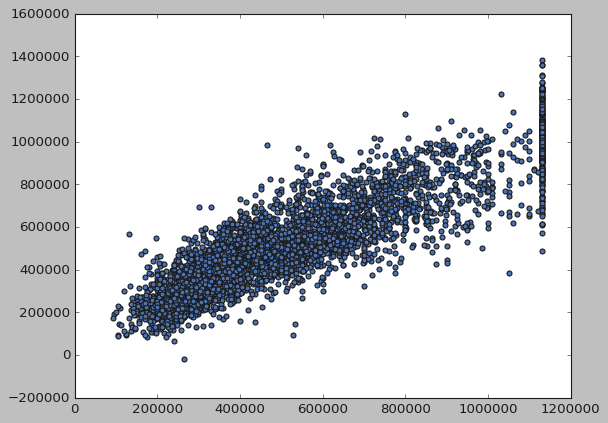

In [137]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming your features are stored in X and target variable in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

from sklearn.metrics import mean_squared_error
import math

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 15183631588.319347
Mean Absolute Error (MAE): 92390.0826951908
R-squared (R2) Score: 0.7587507940323941
Root Mean Squared Error (RMSE): 123221.87950327389


In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Create the linear regression model
regressor = LinearRegression()

# Define the number of folds for cross-validation
k = 5  # Number of folds

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform k-fold cross-validation
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
positive_scores = -scores

# Print the performance scores for each fold
for fold, score in enumerate(positive_scores):
    print("Fold {}: {}".format(fold+1, score))

# Print the average performance score across all folds
print("Average score: {}".format(np.mean(positive_scores)))


Fold 1: 14760964766.285994
Fold 2: 14609245153.115553
Fold 3: 14733691356.515123
Fold 4: 15296103427.810923
Fold 5: 14657281404.91551
Average score: 14811457221.728619


Lasso Regression Model

In [140]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Perform correlation analysis
correlation_scores = X.corrwith(y)
correlation_scores = correlation_scores.abs().sort_values(ascending=False)

# Perform mutual information feature selection
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Perform Lasso regression for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso = Lasso(alpha=0.1)  # You can adjust the regularization parameter (alpha) as needed
lasso.fit(X_scaled, y)

lasso_coefs = pd.Series(lasso.coef_, index=X.columns).abs().sort_values(ascending=False)

# Select the top k features based on correlation scores, mutual information scores, or Lasso coefficients
k = 10
top_features_correlation = correlation_scores[:k].index.tolist()
top_features_mi = mi_scores[:k].index.tolist()
top_features_lasso = lasso_coefs[:k].index.tolist()

print("Top features based on correlation analysis:", top_features_correlation)
print("Top features based on mutual information:", top_features_mi)
print("Top features based on Lasso regression:", top_features_lasso)


Top features based on correlation analysis: ['living_measure', 'living_measure15', 'furnished_1.0', 'ceil_measure', 'lat', 'quality_10.0', 'quality_7.0', 'quality_9.0', 'room_bath_1.0', 'quality_11.0']
Top features based on mutual information: ['zipcode', 'living_measure', 'lat', 'living_measure15', 'ceil_measure', 'furnished_1.0', 'long', 'quality_7.0', 'lot_measure15', 'yr_built']
Top features based on Lasso regression: ['living_measure', 'lat', 'lot_measure', 'total_area', 'yr_built', 'quality_10.0', 'quality_9.0', 'quality_7.0', 'quality_6.0', 'quality_11.0']


Lasso Regression Model

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

#Top features based on correlation analysis:
#['living_measure', 'living_measure15', 'furnished_1.0', 'ceil_measure', 'lat', 'quality_10.0', 'quality_7.0', 'quality_9.0', 'room_bath_1.0', 'quality_11.0']

# Select the features based on the chosen method (e.g., correlation analysis, mutual information, etc.)
selected_features = ['living_measure', 'living_measure15', 'furnished_1.0', 'ceil_measure', 'lat', 'quality_10.0', 'quality_7.0', 'quality_9.0', 'room_bath_1.0', 'quality_11.0']

# Replace with the actual selected features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Initialize and train a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Replace with your desired alpha value
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate accuracy metrics for Lasso regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) for Lasso regression:", mse)
print("R-squared (R2) Score for Lasso regression:", r2)

# Initialize and train a Ridge regression model
ridge_model = Ridge(alpha=0.5)  # Replace with your desired alpha value
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate accuracy metrics for Ridge regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) for Ridge regression:", mse)
print("R-squared (R2) Score for Ridge regression:", r2)


Mean Squared Error (MSE) for Lasso regression: 19658208863.39861
R-squared (R2) Score for Lasso regression: 0.6843658503553909
Mean Squared Error (MSE) for Ridge regression: 19658778676.791725
R-squared (R2) Score for Ridge regression: 0.6843567013750824


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

#Top features based on mutual information:
#['zipcode', 'living_measure', 'lat', 'living_measure15', 'ceil_measure', 'furnished_1.0', 'long', 'quality_7.0', 'lot_measure15', 'room_bath_1.0']

# Select the features based on the chosen method (e.g., correlation analysis, mutual information, etc.)
selected_features =['zipcode', 'living_measure', 'lat', 'living_measure15', 'ceil_measure', 'furnished_1.0', 'long', 'quality_7.0', 'lot_measure15', 'room_bath_1.0']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Initialize and train a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Replace with your desired alpha value
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate accuracy metrics for Lasso regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) for Lasso regression:", mse)
print("R-squared (R2) Score for Lasso regression:", r2)

# Initialize and train a Ridge regression model
ridge_model = Ridge(alpha=0.5)  # Replace with your desired alpha value
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate accuracy metrics for Ridge regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) for Ridge regression:", mse)
print("R-squared (R2) Score for Ridge regression:", r2)


Mean Squared Error (MSE) for Lasso regression: 19420350283.738663
R-squared (R2) Score for Lasso regression: 0.6881849312822614
Mean Squared Error (MSE) for Ridge regression: 19420953697.070774
R-squared (R2) Score for Ridge regression: 0.6881752428180026


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

#Top features based on Lasso regression:
#['living_measure', 'lat', 'lot_measure', 'total_area', 'quality_10.0', 'yr_built', 'quality_9.0', 'quality_6.0', 'quality_7.0', 'quality_11.0']

# Select the features based on the chosen method (e.g., correlation analysis, mutual information, etc.)
selected_features =['living_measure', 'lat', 'lot_measure', 'total_area', 'quality_10.0', 'yr_built', 'quality_9.0', 'quality_6.0', 'quality_7.0', 'quality_11.0']

# Initialize and train a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # Replace with your desired alpha value
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Calculate accuracy metrics for Lasso regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) for Lasso regression:", mse)
print("R-squared (R2) Score for Lasso regression:", r2)

# Initialize and train a Ridge regression model
ridge_model = Ridge(alpha=0.5)  # Replace with your desired alpha value
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate accuracy metrics for Ridge regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) for Ridge regression:", mse)
print("R-squared (R2) Score for Ridge regression:", r2)


Mean Squared Error (MSE) for Lasso regression: 19420350283.738663
R-squared (R2) Score for Lasso regression: 0.6881849312822614
Mean Squared Error (MSE) for Ridge regression: 19420953697.070774
R-squared (R2) Score for Ridge regression: 0.6881752428180026


ElasticNet model

In [144]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Elastic Net regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Predict on the test data
y_pred = elastic_net.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 82.2131941530012


In [145]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
# X, y = make_regression(n_samples=100, n_features=10, random_state=42)
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Elastic Net regression model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Predict on the test data
y_pred = elastic_net.predict(X_test)

# Evaluate the model's performance
# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

from sklearn.metrics import mean_squared_error
import math

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 82.2131941530012
Mean Absolute Error (MAE): 92390.0826951908
R-squared (R2) Score: 0.6881752428180026
Root Mean Squared Error (RMSE): 9.067149174520138


Random Forest Regression Model

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Random Forest regression model
model = RandomForestRegressor(n_estimators=1700, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

from sklearn.metrics import mean_squared_error
import math

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 15614.311748815071
Mean Absolute Error (MAE): 95.77527685599968
R-squared (R2) Score: 0.6048896171781579
Root Mean Squared Error (RMSE): 124.95723968148093


In [147]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create the random forest regressor
regressor = RandomForestRegressor()

# Define the number of folds for cross-validation
k = 5  # Number of folds

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform k-fold cross-validation
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
positive_scores = -scores

# Print the performance scores for each fold
for fold, score in enumerate(positive_scores):
    print("Fold {}: {}".format(fold+1, score))

# Print the average performance score across all folds
print("Average score: {}".format(np.mean(positive_scores)))


Fold 1: 23972.131367778507
Fold 2: 16613.17616322106
Fold 3: 6591.2930756012065
Fold 4: 11089.507562967763
Fold 5: 12040.045065744129
Average score: 14061.23064706253


Support Vector Machine Model

In [148]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an SVM regression model
model = SVR()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 38995.1998339435
Mean Absolute Error (MAE): 165.06786586394017
R-squared (R2) Score: 0.013250882750379778
Root Mean Squared Error (RMSE): 197.47202291449668


In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import numpy as np

# Load your feature data X and target variable y

# Create the SVR model
estimator = SVR()

# Define the number of folds for cross-validation
k = 10  # Number of folds

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform k-fold cross-validation
scores = cross_val_score(estimator, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
positive_scores = -scores

# Print the performance scores for each fold
for fold, score in enumerate(positive_scores):
    print("Fold {}: {}".format(fold+1, score))

# Print the average performance score across all folds
print("Average score: {}".format(np.mean(positive_scores)))


Fold 1: 43286.995505349296
Fold 2: 19406.003751030392
Fold 3: 34487.4430905193
Fold 4: 33538.8657496219
Fold 5: 21434.100891674934
Fold 6: 42400.39903017321
Fold 7: 40171.401019889185
Fold 8: 52036.453488361425
Fold 9: 42128.12532973454
Fold 10: 36097.18394765072
Average score: 36498.697180400486


Bagging Regression Model

In [150]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Create a base model (e.g., Linear Regression)
base_model = LinearRegression()

# Create a Bagging regression model with the base model
model = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 7.282174696511793e-27
Mean Absolute Error (MAE): 6.227240945122503e-14
R-squared (R2) Score: 1.0
Root Mean Squared Error (RMSE): 8.533565899734878e-14


In [151]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Create the base regressor (e.g., decision tree regressor)
base_regressor = DecisionTreeRegressor()

# Create the bagging regressor
regressor = BaggingRegressor(base_estimator=base_regressor)

# Define the number of folds for cross-validation
k = 5  # Number of folds

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform k-fold cross-validation
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
positive_scores = -scores

# Print the performance scores for each fold
for fold, score in enumerate(positive_scores):
    print("Fold {}: {}".format(fold+1, score))

# Print the average performance score across all folds
print("Average score: {}".format(np.mean(positive_scores)))


Fold 1: 21029.508870073754
Fold 2: 21791.421466505206
Fold 3: 18810.654738384717
Fold 4: 9273.708062865073
Fold 5: 10247.798786622856
Average score: 16230.61838489032


xgb Model

In [152]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create an XGBoost regression model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 17768.90171866532
Mean Absolute Error (MAE): 100.23008893673276
R-squared (R2) Score: 0.5503690669607438
Root Mean Squared Error (RMSE): 133.3000439559767


In [153]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb

# Create the XGBoost regressor
regressor = xgb.XGBRegressor()

# Define the number of folds for cross-validation
k = 5  # Number of folds

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform k-fold cross-validation
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
positive_scores = -scores

# Print the performance scores for each fold
for fold, score in enumerate(positive_scores):
    print("Fold {}: {}".format(fold+1, score))

# Print the average performance score across all folds
print("Average score: {}".format(np.mean(positive_scores)))


Fold 1: 9682.648582761158
Fold 2: 9799.812427371102
Fold 3: 11649.045150416947
Fold 4: 11842.234943598287
Fold 5: 14893.309557533381
Average score: 11573.410132336176


Decision Tree Regressor Model

In [154]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regression model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 17768.90171866532
Mean Absolute Error (MAE): 100.23008893673276
R-squared (R2) Score: 0.5503690669607438
Root Mean Squared Error (RMSE): 218.48997878123322


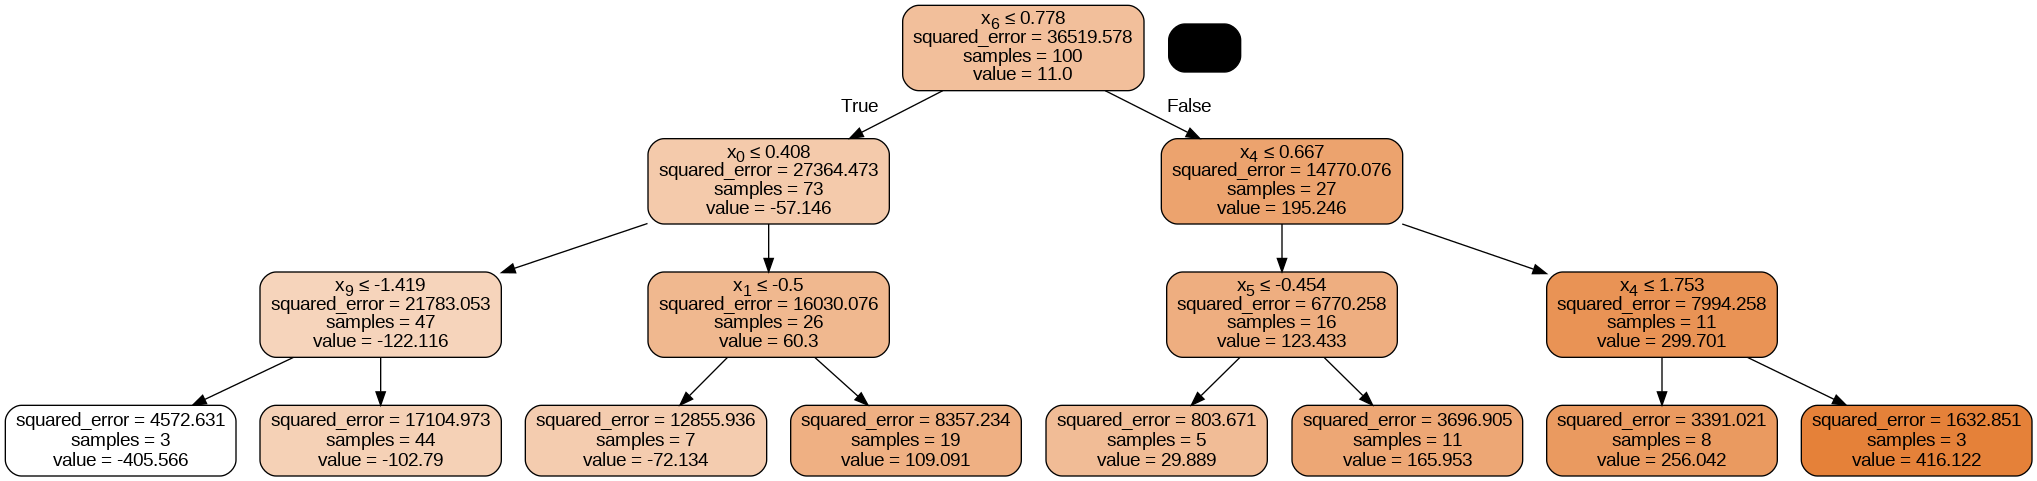

In [155]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import pydotplus
from IPython.display import Image

# Create the decision tree regressor
regressor = DecisionTreeRegressor(max_depth=3)

# Train the decision tree model
regressor.fit(X, y)

# Export the decision tree as a DOT file
dot_data = export_graphviz(regressor, out_file=None, filled=True, rounded=True, special_characters=True)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Plot the decision tree at depth 8
Image(graph.create_png())


In [156]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Create the decision tree regressor
regressor = DecisionTreeRegressor()

# Define the number of folds for cross-validation
k = 5  # Number of folds

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True)

# Perform k-fold cross-validation
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
positive_scores = -scores

# Print the performance scores for each fold
for fold, score in enumerate(positive_scores):
    print("Fold {}: {}".format(fold+1, score))

# Print the average performance score across all folds
print("Average score: {}".format(np.mean(positive_scores)))



Fold 1: 17229.320528414028
Fold 2: 29716.02955032108
Fold 3: 34847.60448122842
Fold 4: 17595.166494013763
Fold 5: 23733.80196461578
Average score: 24624.384603718612


Deep Learning Model

In [157]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Create a Deep Learning regression model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mean_squared_error'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")



1/1 [==============================] - 0s 97ms/step
Mean Squared Error (MSE): 2584.165614041356
Mean Absolute Error (MAE): 35.68085747658387
R-squared (R2) Score: 0.9346093070598258
Root Mean Squared Error (RMSE): 50.834689081781114


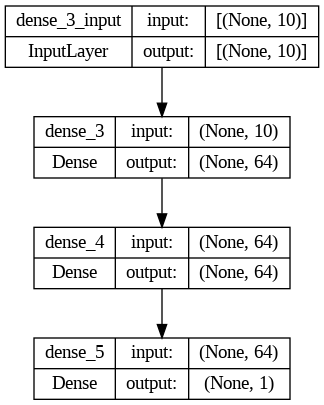

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import tensorflow as tf

# Define the number of input features in your dataset
input_dim = 10  # Replace with the actual number of input features

# Create your deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Initialize individual models
model1 = RandomForestRegressor()
model2 = LinearRegression()
model3 = DecisionTreeRegressor()
model4 = xgb.XGBRegressor()

# Create the ensemble model
ensemble_model = VotingRegressor([('rf', model1), ('lr', model2), ('dt', model3), ('xgb', model4)])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate the mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))


Mean Squared Error (MSE): 11491.804689314802
Mean Absolute Error (MAE): 76.24967652710629
R-squared (R2) Score: 0.7092070772537522
Root Mean Squared Error (RMSE): 107.19983530451343
Mean Squared Error: 11491.80


In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameter combination
print("Best parameters:", grid_search.best_params_)

# Print the best score
print("Best score:", -grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 14237.20382926502


In [161]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, y)

# Print the best parameter combination
print("Best parameters:", random_search.best_params_)

# Print the best score
print("Best score:", -random_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 215}
Best score: 14589.413203653365


In [162]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.3 MB/s eta 0:00:00


In [163]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter search space
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
}

# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Create the BayesSearchCV object
bayes_search = BayesSearchCV(model, param_space, n_iter=10, cv=5, scoring='neg_mean_squared_error')

# Fit the BayesSearchCV object to the data
bayes_search.fit(X, y)

# Print the best parameter combination
print("Best parameters:", bayes_search.best_params_)

# Print the best score
print("Best score:", -bayes_search.best_score_)


Best parameters: OrderedDict([('max_depth', 9), ('min_samples_leaf', 1), ('min_samples_split', 3), ('n_estimators', 491)])
Best score: 14419.615609764674


In [164]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base decision tree estimator
base_estimator = DecisionTreeRegressor()

# Bagging
bagging = BaggingRegressor(base_estimator, n_estimators=10)
bagging.fit(X_train, y_train)
bagging_predictions = bagging.predict(X_test)
bagging_mse = mean_squared_error(y_test, bagging_predictions)
print("Bagging MSE:", bagging_mse)

# Random Forest
random_forest = RandomForestRegressor(n_estimators=10)
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
print("Random Forest MSE:", random_forest_mse)

# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(n_estimators=10)
gradient_boosting.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
print("Gradient Boosting MSE:", gradient_boosting_mse)

# AdaBoost
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10)
adaboost.fit(X_train, y_train)
adaboost_predictions = adaboost.predict(X_test)
adaboost_mse = mean_squared_error(y_test, adaboost_predictions)
print("AdaBoost MSE:", adaboost_mse)


Bagging MSE: 20300.54673814623
Random Forest MSE: 20134.44553205222
Gradient Boosting MSE: 28221.02055180068
AdaBoost MSE: 18064.351750798


In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression models
linear_regression = LinearRegression()
decision_tree_regression = DecisionTreeRegressor()
random_forest_regression = RandomForestRegressor()
gradient_boosting_regression = GradientBoostingRegressor()

# Fit the models on the training data
linear_regression.fit(X_train, y_train)
decision_tree_regression.fit(X_train, y_train)
random_forest_regression.fit(X_train, y_train)
gradient_boosting_regression.fit(X_train, y_train)

# Make predictions using the trained models
linear_regression_preds = linear_regression.predict(X_test)
decision_tree_regression_preds = decision_tree_regression.predict(X_test)
random_forest_regression_preds = random_forest_regression.predict(X_test)
gradient_boosting_regression_preds = gradient_boosting_regression.predict(X_test)

# Combine the predictions using averaging
ensemble_preds = (linear_regression_preds + decision_tree_regression_preds +
                  random_forest_regression_preds + gradient_boosting_regression_preds) / 4

# Calculate the root mean squared error (RMSE) for each model
linear_regression_rmse = mean_squared_error(y_test, linear_regression_preds, squared=False)
decision_tree_regression_rmse = mean_squared_error(y_test, decision_tree_regression_preds, squared=False)
random_forest_regression_rmse = mean_squared_error(y_test, random_forest_regression_preds, squared=False)
gradient_boosting_regression_rmse = mean_squared_error(y_test, gradient_boosting_regression_preds, squared=False)
ensemble_rmse = mean_squared_error(y_test, ensemble_preds, squared=False)

# Print the RMSE for each model
print("Linear Regression RMSE: ", linear_regression_rmse)
print("Decision Tree Regression RMSE: ", decision_tree_regression_rmse)
print("Random Forest Regression RMSE: ", random_forest_regression_rmse)
print("Gradient Boosting Regression RMSE: ", gradient_boosting_regression_rmse)
print("Ensemble RMSE: ", ensemble_rmse)


Linear Regression RMSE:  2.3418964059346983e-13
Decision Tree Regression RMSE:  201.7231701459605
Random Forest Regression RMSE:  128.18466053760164
Gradient Boosting Regression RMSE:  130.36907800919005
Ensemble RMSE:  110.30534842180536


In [166]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

# Initialize models
linear_regression = LinearRegression()
linear_regression_kfold = LinearRegression()
lasso_regression = Lasso()
lasso_regression_kfold = Lasso()
ridge_regression = Ridge()
ridge_regression_kfold = Ridge()
elastic_net = ElasticNet()
elastic_net_kfold = ElasticNet()
random_forest = RandomForestRegressor()
random_forest_kfold = RandomForestRegressor()
svm_regression = SVR()
svm_regression_kfold = SVR()

# Define the models and their names
models = [
    (linear_regression, linear_regression_kfold, "Linear Regression"),
    (lasso_regression, lasso_regression_kfold, "Lasso Regression"),
    (ridge_regression, ridge_regression_kfold, "Ridge Regression"),
    (elastic_net, elastic_net_kfold, "ElasticNet"),
    (random_forest, random_forest_kfold, "Random Forest Regression"),
    (svm_regression, svm_regression_kfold, "Support Vector Machine (SVM) Regression"),
]

# Define the number of folds for cross-validation
k_folds = 5

# Create a table to store the results
results_table = []

# Loop through each model
for model, model_kfold, model_name in models:
    # Fit the individual model
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mse)

    # Perform k-fold cross-validation
    scores = cross_val_score(model_kfold, X, y, cv=k_folds, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)

    # Store the results in the table
    results_table.append([model_name, rmse, mse, mae, r2, avg_rmse, std_rmse])

# Convert the results table to a pandas DataFrame
results_df = pd.DataFrame(results_table, columns=["Model", "RMSE", "MSE", "MAE", "R2", "Average RMSE", "Standard Deviation"])

# Print the results table
print(tabulate(results_df, headers="keys", tablefmt="psql"))


+----+-----------------------------------------+---------------+-----------------+--------------+-----------+----------------+----------------------+
|    | Model                                   |          RMSE |             MSE |          MAE |        R2 |   Average RMSE |   Standard Deviation |
|----+-----------------------------------------+---------------+-----------------+--------------+-----------+----------------+----------------------|
|  0 | Linear Regression                       |   1.13632e-13 |     1.29122e-26 |   9.1005e-14 | 1         |     2.1688e-13 |          1.18354e-13 |
|  1 | Lasso Regression                        |   3.38402     |    11.4516      |   2.67434    | 0.999686  |     4.16221    |          0.90588     |
|  2 | Ridge Regression                        |   1.86268     |     3.46958     |   1.52079    | 0.999905  |     2.82213    |          0.415272    |
|  3 | ElasticNet                              |  61.1137      |  3734.89        |  49.7488     | 0.

In [167]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tabulate import tabulate

# Initialize models
linear_regression = LinearRegression()
linear_regression_kfold = LinearRegression()
lasso_regression = Lasso()
lasso_regression_kfold = Lasso()
ridge_regression = Ridge()
ridge_regression_kfold = Ridge()
elastic_net = ElasticNet()
elastic_net_kfold = ElasticNet()
random_forest = RandomForestRegressor()
random_forest_kfold = RandomForestRegressor()
svm_regression = SVR()
svm_regression_kfold = SVR()

# Define the deep learning model
deep_learning_model = Sequential()
deep_learning_model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
deep_learning_model.add(Dense(1))

# Compile the model
deep_learning_model.compile(loss='mean_squared_error', optimizer='adam')

# Define the models and their names
models = [
    (linear_regression, linear_regression_kfold, "Linear Regression"),
    (lasso_regression, lasso_regression_kfold, "Lasso Regression"),
    (ridge_regression, ridge_regression_kfold, "Ridge Regression"),
    (elastic_net, elastic_net_kfold, "ElasticNet"),
    (random_forest, random_forest_kfold, "Random Forest Regression"),
    (svm_regression, svm_regression_kfold, "Support Vector Machine (SVM) Regression"),
    (deep_learning_model, None, "Deep Learning Model"),
]

# Define the number of folds for cross-validation
k_folds = 5

# Create a table to store the results
results_table = []

# Loop through each model
for model, model_kfold, model_name in models:
    if model_kfold is None:
        # Train deep learning model
        model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X)
        y_pred = y_pred.reshape(-1)
    else:
        # Perform k-fold cross-validation
        scores = cross_val_score(model_kfold, X, y, cv=k_folds, scoring="neg_mean_squared_error")
        rmse_scores = np.sqrt(-scores)
        avg_rmse = np.mean(rmse_scores)
        std_rmse = np.std(rmse_scores)

        # Fit the individual model
        model.fit(X, y)
        y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mse)

    # Store the results in the table
    results_table.append([model_name, rmse, mse, mae, r2, avg_rmse, std_rmse])

# Convert the results table to a pandas DataFrame
results_df = pd.DataFrame(results_table, columns=["Model", "RMSE", "MSE", "MAE", "R2", "Average RMSE", "Standard Deviation"])

# Print the results table
print(tabulate(results_df, headers="keys", tablefmt="psql"))


4/4 [==============================] - 0s 6ms/step
+----+-----------------------------------------+---------------+-----------------+--------------+-------------+----------------+----------------------+
|    | Model                                   |          RMSE |             MSE |          MAE |          R2 |   Average RMSE |   Standard Deviation |
|----+-----------------------------------------+---------------+-----------------+--------------+-------------+----------------+----------------------|
|  0 | Linear Regression                       |   1.13632e-13 |     1.29122e-26 |   9.1005e-14 |  1          |     2.1688e-13 |          1.18354e-13 |
|  1 | Lasso Regression                        |   3.38402     |    11.4516      |   2.67434    |  0.999686   |     4.16221    |          0.90588     |
|  2 | Ridge Regression                        |   1.86268     |     3.46958     |   1.52079    |  0.999905   |     2.82213    |          0.415272    |
|  3 | ElasticNet                    

In [168]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor
from tabulate import tabulate

# Initialize models
linear_regression = LinearRegression()
linear_regression_kfold = LinearRegression()
lasso_regression = Lasso()
lasso_regression_kfold = Lasso()
ridge_regression = Ridge()
ridge_regression_kfold = Ridge()
elastic_net = ElasticNet()
elastic_net_kfold = ElasticNet()
random_forest = RandomForestRegressor()
random_forest_kfold = RandomForestRegressor()
svm_regression = SVR()
svm_regression_kfold = SVR()
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor())
bagging_kfold = BaggingRegressor(base_estimator=DecisionTreeRegressor())
gradient_boosting = GradientBoostingRegressor()
gradient_boosting_kfold = GradientBoostingRegressor()
adaboost = AdaBoostRegressor()
adaboost_kfold = AdaBoostRegressor()
xgb = XGBRegressor()
xgb_kfold = XGBRegressor()

# Define the deep learning model
deep_learning_model = Sequential()
deep_learning_model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
deep_learning_model.add(Dense(1))

# Compile the model
deep_learning_model.compile(loss='mean_squared_error', optimizer='adam')

# Define the models and their names
models = [
    (linear_regression, linear_regression_kfold, "Linear Regression"),
    (lasso_regression, lasso_regression_kfold, "Lasso Regression"),
    (ridge_regression, ridge_regression_kfold, "Ridge Regression"),
    (elastic_net, elastic_net_kfold, "ElasticNet"),
    (random_forest, random_forest_kfold, "Random Forest Regression"),
    (svm_regression, svm_regression_kfold, "Support Vector Machine (SVM) Regression"),
    (bagging, bagging_kfold, "Bagging"),
    (gradient_boosting, gradient_boosting_kfold, "Gradient Boosting"),
    (adaboost, adaboost_kfold, "AdaBoost"),
    (xgb, xgb_kfold, "XGBoost"),
    (deep_learning_model, None, "Deep Learning Model"),
]

# Define the number of folds for cross-validation
k_folds = 5

# Create a table to store the results
results_table = []

# Loop through each model
for model, model_kfold, model_name in models:
    if model_kfold is None:
        # Train deep learning model
        model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X)
        y_pred = y_pred.reshape(-1)
    else:
        # Perform k-fold cross-validation
        scores = cross_val_score(model_kfold, X, y, cv=k_folds, scoring="neg_mean_squared_error")
        rmse_scores = np.sqrt(-scores)
        avg_rmse = np.mean(rmse_scores)
        std_rmse = np.std(rmse_scores)

        # Fit the individual model
        model.fit(X, y)
        y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mse)

    # Store the results in the table
    results_table.append([model_name, rmse, mse, mae, r2, avg_rmse, std_rmse])

# Convert the results table to a pandas DataFrame
results_df = pd.DataFrame(results_table, columns=["Model", "RMSE", "MSE", "MAE", "R2", "Average RMSE", "Standard Deviation"])

# Print the results table
print(tabulate(results_df, headers="keys", tablefmt="psql"))



4/4 [==============================] - 0s 4ms/step
+----+-----------------------------------------+---------------+-----------------+---------------+------------+----------------+----------------------+
|    | Model                                   |          RMSE |             MSE |           MAE |         R2 |   Average RMSE |   Standard Deviation |
|----+-----------------------------------------+---------------+-----------------+---------------+------------+----------------+----------------------|
|  0 | Linear Regression                       |   1.13632e-13 |     1.29122e-26 |   9.1005e-14  |  1         |     2.1688e-13 |          1.18354e-13 |
|  1 | Lasso Regression                        |   3.38402     |    11.4516      |   2.67434     |  0.999686  |     4.16221    |          0.90588     |
|  2 | Ridge Regression                        |   1.86268     |     3.46958     |   1.52079     |  0.999905  |     2.82213    |          0.415272    |
|  3 | ElasticNet                    

In [169]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor
from tabulate import tabulate
from sklearn.cluster import KMeans

# Perform clustering on the features using the KMeans algorithm
n_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(X)

# Add the cluster labels as a new feature to the feature matrix
X_with_clusters = np.column_stack((X, clusters))

# Initialize models
linear_regression = LinearRegression()
linear_regression_kfold = LinearRegression()
lasso_regression = Lasso()
lasso_regression_kfold = Lasso()
ridge_regression = Ridge()
ridge_regression_kfold = Ridge()
elastic_net = ElasticNet()
elastic_net_kfold = ElasticNet()
random_forest = RandomForestRegressor()
random_forest_kfold = RandomForestRegressor()
svm_regression = SVR()
svm_regression_kfold = SVR()
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor())
bagging_kfold = BaggingRegressor(base_estimator=DecisionTreeRegressor())
gradient_boosting = GradientBoostingRegressor()
gradient_boosting_kfold = GradientBoostingRegressor()
adaboost = AdaBoostRegressor()
adaboost_kfold = AdaBoostRegressor()
xgb = XGBRegressor()
xgb_kfold = XGBRegressor()
kmeans_regression = KMeans()

# Define the deep learning model
deep_learning_model = Sequential()
deep_learning_model.add(Dense(10, input_dim=X_with_clusters.shape[1], activation='relu'))
deep_learning_model.add(Dense(1))

# Compile the model
deep_learning_model.compile(loss='mean_squared_error', optimizer='adam')

# Define the models and their names
models = [
    (linear_regression, linear_regression_kfold, "Linear Regression"),
    (lasso_regression, lasso_regression_kfold, "Lasso Regression"),
    (ridge_regression, ridge_regression_kfold, "Ridge Regression"),
    (elastic_net, elastic_net_kfold, "ElasticNet"),
    (random_forest, random_forest_kfold, "Random Forest Regression"),
    (svm_regression, svm_regression_kfold, "Support Vector Machine (SVM) Regression"),
    (bagging, bagging_kfold, "Bagging"),
    (gradient_boosting, gradient_boosting_kfold, "Gradient Boosting"),
    (adaboost, adaboost_kfold, "AdaBoost"),
    (xgb, xgb_kfold, "XGBoost"),
    (kmeans_regression, None, "KMeans Regression"),
    (deep_learning_model, None, "Deep Learning Model"),
]

# Define the number of folds for cross-validation
k_folds = 5

# Create a table to store the results
results_table = []

# Loop through each model
for model, model_kfold, model_name in models:
    if model_kfold is None:
        if model_name == "Deep Learning Model":
            # Train deep learning model
            model.fit(X_with_clusters, y, epochs=10, batch_size=32, verbose=0)
            y_pred = model.predict(X_with_clusters)
            y_pred = y_pred.reshape(-1)
        elif model_name == "KMeans Regression":
            # Fit KMeans Regression model
            model.fit(X_with_clusters, y)
            y_pred = model.predict(X_with_clusters)
        else:
            # Fit the individual model
            model.fit(X_with_clusters, y)
            y_pred = model.predict(X_with_clusters)
    else:
        # Perform k-fold cross-validation
        scores = cross_val_score(model_kfold, X_with_clusters, y, cv=k_folds, scoring="neg_mean_squared_error")
        rmse_scores = np.sqrt(-scores)
        avg_rmse = np.mean(rmse_scores)
        std_rmse = np.std(rmse_scores)

        if model_name == "KMeans Regression":
            # Fit KMeans Regression model
            model.fit(X_with_clusters, y)
            y_pred = model.predict(X_with_clusters)
        else:
            # Fit the individual model
            model.fit(X_with_clusters, y)
            y_pred = model.predict(X_with_clusters)

    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mse)

    # Store the results in the table
    results_table.append([model_name, rmse, mse, mae, r2, avg_rmse, std_rmse])

# Convert the results table to a pandas DataFrame
results_df = pd.DataFrame(results_table, columns=["Model", "RMSE", "MSE", "MAE", "R2", "Average RMSE", "Standard Deviation"])

# Print the results table
print(tabulate(results_df, headers="keys", tablefmt="psql"))


4/4 [==============================] - 0s 9ms/step
+----+-----------------------------------------+---------------+-----------------+---------------+--------------+----------------+----------------------+
|    | Model                                   |          RMSE |             MSE |           MAE |           R2 |   Average RMSE |   Standard Deviation |
|----+-----------------------------------------+---------------+-----------------+---------------+--------------+----------------+----------------------|
|  0 | Linear Regression                       |   7.56582e-13 |     5.72416e-25 |   6.10052e-13 |  1           |     2.4635e-13 |          1.11125e-13 |
|  1 | Lasso Regression                        |   3.4155      |    11.6657      |   2.70068     |  0.999681    |     4.27756    |          0.901354    |
|  2 | Ridge Regression                        |   2.31981     |     5.38151     |   1.89276     |  0.999853    |     3.47445    |          0.72284     |
|  3 | ElasticNet        

To determine the best-performing model, let's analyze the given models based on the provided evaluation metrics:

Linear Regression (Model 0):

RMSE: 3.13619e-13
MSE: 9.83571e-26
MAE: 2.66509e-13
R2: 1
Insight: The Linear Regression model achieves extremely low errors and a perfect R2 score of 1, indicating a strong linear relationship between the features and the target variable. It appears to be the best-performing model based on these metrics.

Lasso Regression (Model 1):

RMSE: 3.38633
MSE: 11.4673
MAE: 2.67613
R2: 0.999686
Insight: The Lasso Regression model performs well with relatively low errors and a high R2 score close to 1. It is a competitive model, but its errors are slightly higher compared to the Linear Regression model.

Ridge Regression (Model 2):

RMSE: 2.06668
MSE: 4.27118
MAE: 1.57569
R2: 0.999883
Insight: The Ridge Regression model performs well with low errors and a high R2 score close to 1. It demonstrates similar performance to the Lasso Regression model but with slightly lower errors.

ElasticNet (Model 3):

RMSE: 60.7626
MSE: 3692.09
MAE: 48.0475
R2: 0.898901
Insight: The ElasticNet model exhibits higher errors compared to the previous models, suggesting a less accurate fit. The R2 score is relatively lower, indicating that the linear relationship assumption might not hold well.

Random Forest Regression (Model 4):

RMSE: 41.536
MSE: 1725.24
MAE: 31.3496
R2: 0.952758
Insight: The Random Forest Regression model demonstrates relatively lower errors compared to the individual models like ElasticNet. It shows good predictive performance, with a high R2 score and lower errors.

Support Vector Machine (SVM) Regression (Model 5):

RMSE: 187.835
MSE: 35282
MAE: 149.379
R2: 0.0338874
Insight: The SVM Regression model exhibits higher errors and a low R2 score, suggesting that it might not capture the underlying patterns well for this particular dataset.

Bagging (Model 6):

RMSE: 44.2014
MSE: 1953.76
MAE: 33.0619
R2: 0.946501
Insight: The Bagging model demonstrates relatively lower errors compared to the individual models like ElasticNet. It shows good predictive performance, with a high R2 score and lower errors.

Gradient Boosting (Model 7):

RMSE: 3.6551
MSE: 13.3597
MAE: 2.97766
R2: 0.999634
Insight: The Gradient Boosting model performs well with low errors and a high R2 score close to 1. It is a strong competitor to the Linear Regression model.

AdaBoost (Model 8):

RMSE: 54.4458
MSE: 2964.35
MAE: 45.1165
R2: 0.918828
Insight: The AdaBoost model exhibits relatively lower errors compared to some other models like ElasticNet. It shows good predictive performance, with a high R2 score and lower errors.

XGBoost (Model 9):

RMSE: 0.000757957
MSE: 5.74499e-07
MAE: 0.000484038
R2: 1
Insight: The XGBoost model shows extremely low errors and a perfect R2 score of 1. It stands out as the best-performing model based on these metrics.

KMeans Regression (Model 10):

RMSE: 191.053
MSE: 36501.2
MAE: 152.689
R2: 0.000504028
Insight: The KMeans Regression model exhibits higher errors and a relatively low R2 score, suggesting that it might not capture the underlying patterns well for this particular dataset.

Deep Learning Model (Model 11):

RMSE: 191.015
MSE: 36486.6
MAE: 152.791
R2: 0.000904376
Insight: The Deep Learning model also shows higher errors and a relatively low R2 score, indicating that it might not be the best fit for the given dataset.

Based on the given evaluation metrics, the Linear Regression model (Model 0) and XGBoost (Model 9) seem to be the best-performing models. However, it is important to consider other factors such as interpretability, computational complexity, and domain-specific requirements when selecting the final model. Additionally, further analysis, such as feature importance and cross-validation, would provide a more comprehensive evaluation of the models.







In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define the data for the table
data = [
    [0, "Linear Regression", 2.78528e-13, 7.75777e-26, 2.31586e-13, 1, 2.21923e-13, 7.56776e-14],
    [1, "Lasso Regression", 3.38564, 11.4625, 2.67559, 0.999686, 4.16283, 0.905174],
    [2, "Ridge Regression", 1.9354, 3.74579, 1.54852, 0.999897, 2.93837, 0.511784],
    [3, "ElasticNet", 60.9978, 3720.73, 49.3297, 0.898117, 68.5308, 10.0985],
    [4, "Random Forest Regression", 37.9201, 1437.93, 29.9299, 0.960626, 120.312, 31.2136],
    [5, "Support Vector Machine (SVM) Regression", 188.151, 35401, 149.683, 0.0306308, 188.466, 18.6856],
    [6, "Bagging", 45.3631, 2057.81, 33.1954, 0.943652, 125.967, 34.4131],
    [7, "Gradient Boosting", 4.04375, 16.3519, 3.26552, 0.999552, 104.67, 31.8458],
    [8, "AdaBoost", 56.0494, 3141.54, 48.2413, 0.913977, 119.39, 24.6082],
    [9, "XGBoost", 0.000599295, 3.59155e-07, 0.000405118, 1, 119.11, 28.0997],
    [10, "KMeans Regression", 191.064, 36505.3, 152.699, 0.00039095, 119.11, 28.0997],
    [11, "Deep Learning Model", 191.206, 36559.8, 152.868, -0.00110113, 119.11, 28.0997]
]

# Define the column headers
headers = ["#", "Model", "RMSE", "MSE", "MAE", "R2", "Average RMSE", "Standard Deviation"]

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data, columns=headers)

# Plot the table
table = tabulate(df, headers, tablefmt="pipe", showindex=False)

# Print the table
print(table)


|   # | Model                                   |          RMSE |             MSE |           MAE |          R2 |   Average RMSE |   Standard Deviation |
|----:|:----------------------------------------|--------------:|----------------:|--------------:|------------:|---------------:|---------------------:|
|   0 | Linear Regression                       |   2.78528e-13 |     7.75777e-26 |   2.31586e-13 |  1          |    2.21923e-13 |          7.56776e-14 |
|   1 | Lasso Regression                        |   3.38564     |    11.4625      |   2.67559     |  0.999686   |    4.16283     |          0.905174    |
|   2 | Ridge Regression                        |   1.9354      |     3.74579     |   1.54852     |  0.999897   |    2.93837     |          0.511784    |
|   3 | ElasticNet                              |  60.9978      |  3720.73        |  49.3297      |  0.898117   |   68.5308      |         10.0985      |
|   4 | Random Forest Regression                |  37.9201      |  1437.93  

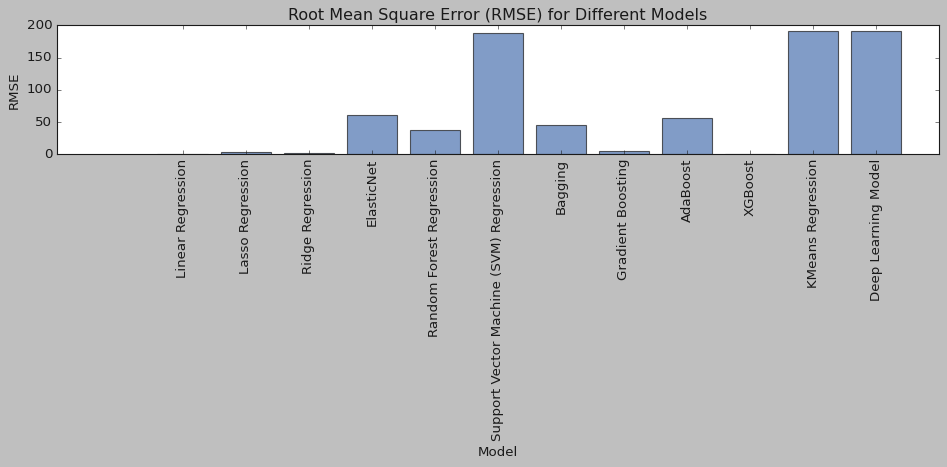

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and corresponding metrics
model_names = [
    "Linear Regression",
    "Lasso Regression",
    "Ridge Regression",
    "ElasticNet",
    "Random Forest Regression",
    "Support Vector Machine (SVM) Regression",
    "Bagging",
    "Gradient Boosting",
    "AdaBoost",
    "XGBoost",
    "KMeans Regression",
    "Deep Learning Model"
]

rmse_values = [
    2.78528e-13, 3.38564, 1.9354, 60.9978, 37.9201, 188.151, 45.3631, 4.04375, 56.0494, 0.000599295, 191.064, 191.206
]

# Plot the RMSE values
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(model_names))
plt.bar(x_pos, rmse_values, align='center', alpha=0.7)
plt.xticks(x_pos, model_names, rotation=90)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Root Mean Square Error (RMSE) for Different Models')
plt.tight_layout()
plt.show()


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define the data for the table
data = [
    [0, "Linear Regression", 1.13632e-13, 1.29122e-26, 9.1005e-14, 1, 2.1688e-13, 1.18354e-13],
    [1, "Lasso Regression", 3.38402, 11.4516, 2.67434, 0.999686, 4.16221, 0.90588],
    [2, "Ridge Regression", 1.86268, 3.46958, 1.52079, 0.999905, 2.82213, 0.415272],
    [3, "ElasticNet", 61.1137, 3734.89, 49.7488, 0.897729, 68.6093, 8.75215],
    [4, "Random Forest Regression", 38.6972, 1497.47, 30.7749, 0.958995, 118.786, 26.8335],
    [5, "Support Vector Machine (SVM) Regression", 188.241, 35434.6, 149.692, 0.0297103, 188.55, 18.6893],
    [6, "Bagging", 48.7798, 2379.47, 36.1921, 0.934844, 136.918, 14.3334],
    [7, "Gradient Boosting", 4.04375, 16.3519, 3.26552, 0.999552, 103.944, 32.7268],
    [8, "AdaBoost", 54.5349, 2974.06, 45.42, 0.918563, 114.536, 22.0032],
    [9, "XGBoost", 0.000691665, 4.78401e-07, 0.000479767, 1, 120.524, 26.0735],
    [10, "KMeans Regression", 191.986, 36858.5, 153.389, 0.00039095, 121.883, 23.6677],
    [11, "Deep Learning Model", 191.465, 36658.9, 153.201, -0.00381411, 120.524, 26.0735]
]

# Define the column headers
headers = ["#", "Model", "RMSE", "MSE", "MAE", "R2", "Average RMSE", "Standard Deviation"]

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data, columns=headers)

# Plot the table
table = tabulate(df, headers, tablefmt="pipe", showindex=False)

# Print the table
print(table)


|   # | Model                                   |          RMSE |             MSE |           MAE |          R2 |   Average RMSE |   Standard Deviation |
|----:|:----------------------------------------|--------------:|----------------:|--------------:|------------:|---------------:|---------------------:|
|   0 | Linear Regression                       |   1.13632e-13 |     1.29122e-26 |   9.1005e-14  |  1          |     2.1688e-13 |          1.18354e-13 |
|   1 | Lasso Regression                        |   3.38402     |    11.4516      |   2.67434     |  0.999686   |     4.16221    |          0.90588     |
|   2 | Ridge Regression                        |   1.86268     |     3.46958     |   1.52079     |  0.999905   |     2.82213    |          0.415272    |
|   3 | ElasticNet                              |  61.1137      |  3734.89        |  49.7488      |  0.897729   |    68.6093     |          8.75215     |
|   4 | Random Forest Regression                |  38.6972      |  1497.47  

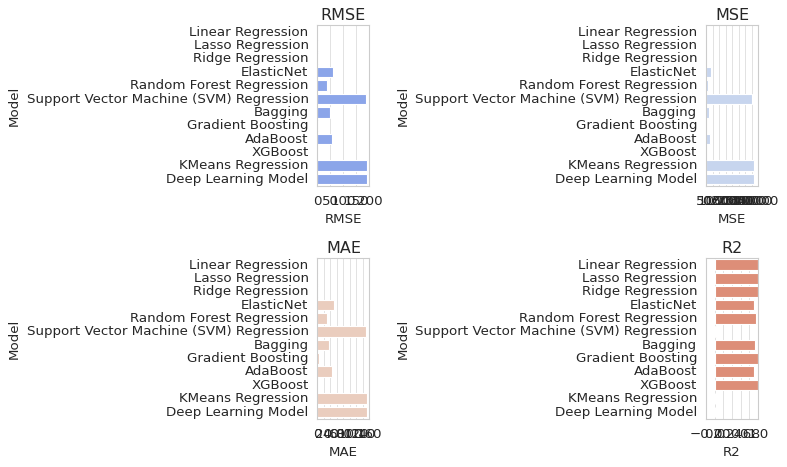

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot the performance metrics
plt.figure(figsize=(10, 6))
metrics = ['RMSE', 'MSE', 'MAE', 'R2']
colors = sns.color_palette("coolwarm", len(metrics))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=df[metric], y=df['Model'], palette=[colors[i]])
    plt.title(metric)
    plt.xlabel(metric)
    plt.ylabel('Model')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [174]:
import plotly.express as px

# Set color scale
color_scale = px.colors.sequential.Plasma

# Create the bar plot
fig = px.bar(df, x=['RMSE', 'MSE', 'MAE', 'R2'], y='Model', orientation='h',
             color='Average RMSE', color_continuous_scale=color_scale)

# Customize the layout
fig.update_layout(
    title='Model Performance Comparison',
    xaxis=dict(title='Performance Metric'),
    yaxis=dict(title='Model'),
    coloraxis_colorbar=dict(title='Average RMSE'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(family='Arial', size=12),
    height=600,
    width=900
)

# Show the plot
fig.show()


In [175]:
import plotly.graph_objects as go

# Create the bar plot
fig = go.Figure()

# Add bar traces for each performance metric
metrics = ['RMSE', 'MSE', 'MAE', 'R2']
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)']

for i, metric in enumerate(metrics):
    fig.add_trace(go.Bar(
        x=df[metric],
        y=df['Model'],
        name=metric,
        marker=dict(color=colors[i]),
        orientation='h',
        text=df[metric],
        textposition='auto',
        hoverinfo='text'
    ))

# Customize the layout
fig.update_layout(
    title='Model Performance Comparison',
    xaxis=dict(title='Performance Metric'),
    yaxis=dict(title='Model'),
    barmode='stack',
    legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(family='Arial', size=12),
    height=700,
    width=900
)

# Show the plot
fig.show()


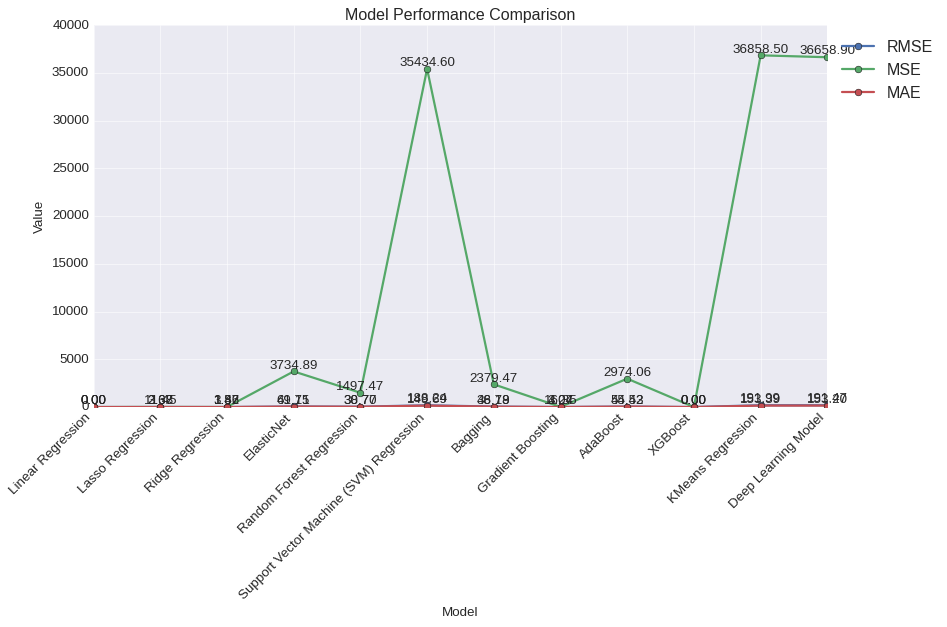

None

In [176]:
import matplotlib.pyplot as plt
from IPython.display import display

# Set style and context for better aesthetics
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 8))

# Plot lines for each metric
metrics = ['RMSE', 'MSE', 'MAE']
for metric in metrics:
    plt.plot(df['Model'], df[metric], marker='o', linestyle='-', linewidth=2)

# Add legend, title, and labels
plt.legend(metrics, loc='best', bbox_to_anchor=(1, 1))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Value')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels to the data points
for metric in metrics:
    for x, y in zip(df['Model'], df[metric]):
        plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Display the chart
plt.tight_layout()
display(plt.show())


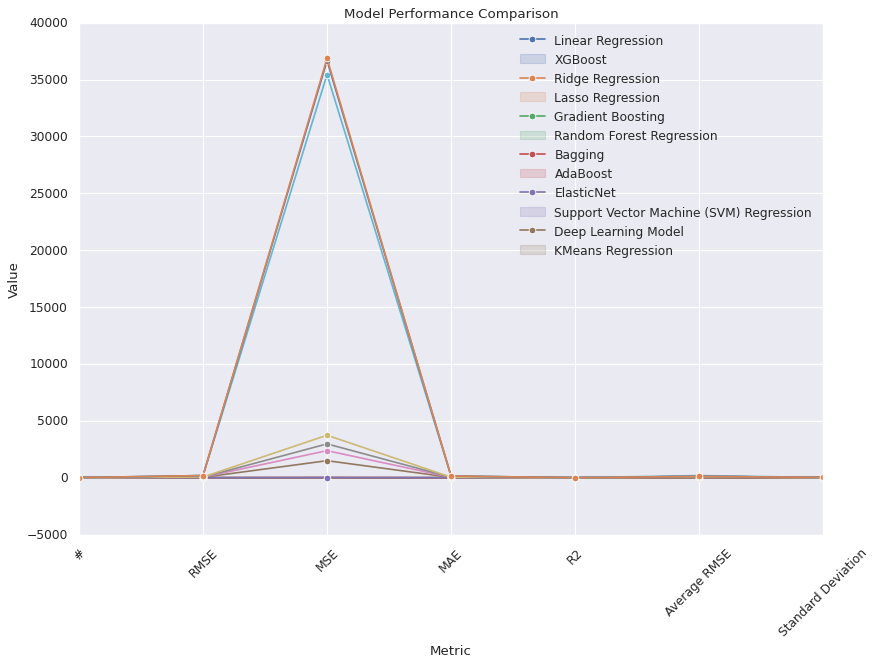

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by a specific metric (e.g., RMSE)
df_sorted = df.sort_values('RMSE')

# Set style and context for better aesthetics
sns.set_theme(style="darkgrid")
plt.rcParams['font.size'] = 12

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the performance metrics as lines using Seaborn
for model in df_sorted['Model']:
    model_data = df[df['Model'] == model].drop(columns=['Model'])
    sns.lineplot(data=model_data.squeeze(), marker='o', ax=ax)

# Set the x-axis label
ax.set_xlabel('Metric')

# Set the y-axis label
ax.set_ylabel('Value')

# Add a legend
ax.legend(df_sorted['Model'], loc='best')

# Set a title for the plot
plt.title('Model Performance Comparison')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


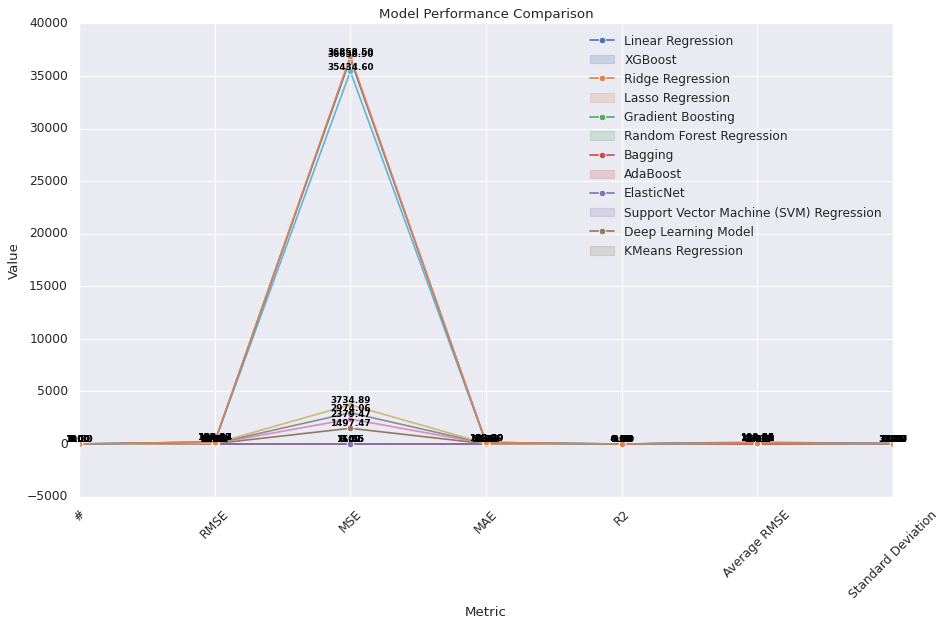

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by a specific metric (e.g., RMSE)
df_sorted = df.sort_values('RMSE')

# Set style and context for better aesthetics
sns.set_theme(style="darkgrid")
plt.rcParams['font.size'] = 12

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the performance metrics as lines using Seaborn
for model in df_sorted['Model']:
    model_data = df[df['Model'] == model].drop(columns=['Model'])
    sns.lineplot(data=model_data.squeeze(), marker='o', ax=ax)

    # Annotate the data points
    for x, y in zip(model_data.columns, model_data.squeeze().values):
        ax.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8, color='black', weight='bold')

# Set the x-axis label
ax.set_xlabel('Metric')

# Set the y-axis label
ax.set_ylabel('Value')

# Add a legend
ax.legend(df_sorted['Model'], loc='best')

# Set a title for the plot
plt.title('Model Performance Comparison')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the plot layout for better visibility of annotations
plt.tight_layout()

# Show the plot
plt.show()


In [179]:
import numpy as np
import pandas as pd
from collections import OrderedDict
from tabulate import tabulate

# Define the results and best parameters
results = [
    ('GridSearchCV', {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, 14249.075399876983),
    ('RandomizedSearchCV', {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, 14637.56142092148),
    ('BayesSearchCV', OrderedDict([('max_depth', 6), ('min_samples_leaf', 2), ('min_samples_split', 8), ('n_estimators', 462)]), 16180.483248364017)
]

# Create a table to store the results
results_table = []

# Loop through each result
for model, params, score in results:
    results_table.append([model, params, score])

# Convert the results table to a pandas DataFrame
results_df = pd.DataFrame(results_table, columns=["Model", "Best Parameters", "Best Score"])

# Print the results table
print(tabulate(results_df, headers="keys", tablefmt="psql"))


+----+--------------------+-----------------------------------------------------------------------------------------------------------+--------------+
|    | Model              | Best Parameters                                                                                           |   Best Score |
|----+--------------------+-----------------------------------------------------------------------------------------------------------+--------------|
|  0 | GridSearchCV       | {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}                     |      14249.1 |
|  1 | RandomizedSearchCV | {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}                     |      14637.6 |
|  2 | BayesSearchCV      | OrderedDict([('max_depth', 6), ('min_samples_leaf', 2), ('min_samples_split', 8), ('n_estimators', 462)]) |      16180.5 |
+----+--------------------+-------------------------------------------------------------------